In [1]:
!pip install plantuml-markdown

In [2]:
!pip install iplantuml

In [4]:
import iplantuml

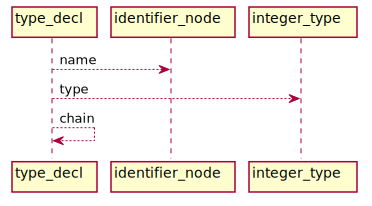

In [45]:
%%plantuml 

@startuml
type_decl --> identifier_node : name
type_decl --> integer_type : type
type_decl --> type_decl : chain
@enduml 

In [10]:
names = {
    'decl': 11526,
    'expr': 11246,
    'identifier_node': 8177,
    'tree_list': 5637,
    'type': 4363,
    'ref': 2438,
    'cst': 1360,
    'list': 470, # statement list
    'constructor': 49
}


def extract_name(name):

    parts = name.split("_")
    if name in names :
        return name

    part = parts[-1]
    if part in names:
        return part



In [14]:

import json
import pprint
#from flatten_dict import flatten
import collections

identifier_field = "_id"
type_field = "_type"

known= [identifier_field,type_field]

data = {}
counter=collections.Counter()
#from type_name_extractor import extract_name

def calculate_types(_data, level_name, target_level):
    # replace for each field the id of the field with the type of its value
    for _id in _data:
        row = data[_id]
        ftype = {}
        type_name = row[type_field]

        row2 = {}
        
        for k in row:
 
            v = row[k]
            if k in known:
                row2[k] = row[k]
            else:
                if isinstance(v,str):
                    if v in _data:
                        to_type = _data[v][type_field]
                        fname = k
                        fname = fname.replace(" ","").replace(":","")
                        d = tuple([type_name, fname, to_type])                        
                        counter[d] += 1



# read in the file and copy the data and create the first type layer
with open("C:/Users/jmike/Documents/GitHub/introspector-data-linux/linux_clean_formatted_compact.json") as fi:
    for li in fi:
        row = json.loads(li)
        type_name = row[type_field]
        _id = row[identifier_field]
        data[_id] = dict(row)        



calculate_types(data, level_name="level_1", target_level="level_2")
for n in counter:
    v = counter[n]
    fname = n[1]
    print("\t".join([
        n[0],
        fname,
        n[2],        
        str(v)]))

type_decl	name	identifier_node	423
type_decl	type	integer_type	244
type_decl	chain	type_decl	888
integer_type	name	type_decl	268
integer_type	size	integer_cst	360
integer_type	min	integer_cst	359
integer_type	max	integer_cst	358
integer_cst	type	integer_type	1027
integer_cst	value	type_decl	145
integer_type	name	identifier_node	2
integer_cst	value	identifier_node	226
integer_cst	value	integer_cst	105
integer_cst	value	integer_type	74
integer_cst	value	field_decl	43
type_decl	type	real_type	13
real_type	name	type_decl	13
real_type	size	integer_cst	13
type_decl	type	complex_type	10
complex_type	name	type_decl	9
complex_type	size	integer_cst	9
type_decl	type	void_type	2
void_type	name	type_decl	5
type_decl	type	array_type	6
array_type	name	type_decl	6
array_type	unql	array_type	70
array_type	size	integer_cst	221
array_type	elts	record_type	28
array_type	domn	integer_type	231
type_decl	type	pointer_type	39
integer_cst	value	function_decl	67
record_type	name	type_decl	103
record_type	size	i

In [9]:
!pip install flatten_dict

In [15]:
counter

Counter({('type_decl', 'name', 'identifier_node'): 423,
         ('type_decl', 'type', 'integer_type'): 244,
         ('type_decl', 'chain', 'type_decl'): 888,
         ('integer_type', 'name', 'type_decl'): 268,
         ('integer_type', 'size', 'integer_cst'): 360,
         ('integer_type', 'min', 'integer_cst'): 359,
         ('integer_type', 'max', 'integer_cst'): 358,
         ('integer_cst', 'type', 'integer_type'): 1027,
         ('integer_cst', 'value', 'type_decl'): 145,
         ('integer_type', 'name', 'identifier_node'): 2,
         ('integer_cst', 'value', 'identifier_node'): 226,
         ('integer_cst', 'value', 'integer_cst'): 105,
         ('integer_cst', 'value', 'integer_type'): 74,
         ('integer_cst', 'value', 'field_decl'): 43,
         ('type_decl', 'type', 'real_type'): 13,
         ('real_type', 'name', 'type_decl'): 13,
         ('real_type', 'size', 'integer_cst'): 13,
         ('type_decl', 'type', 'complex_type'): 10,
         ('complex_type', 'name', '

In [16]:
classnames = { n[0]: 1 for n in counter}

In [17]:
classnames

{'type_decl': 1,
 'integer_type': 1,
 'integer_cst': 1,
 'real_type': 1,
 'complex_type': 1,
 'void_type': 1,
 'array_type': 1,
 'record_type': 1,
 'pointer_type': 1,
 'field_decl': 1,
 'function_decl': 1,
 'function_type': 1,
 'translation_unit_decl': 1,
 'tree_list': 1,
 'enumeral_type': 1,
 'const_decl': 1,
 'parm_decl': 1,
 'bind_expr': 1,
 'return_expr': 1,
 'modify_expr': 1,
 'result_decl': 1,
 'nop_expr': 1,
 'call_expr': 1,
 'addr_expr': 1,
 'union_type': 1,
 'statement_list': 1,
 'switch_expr': 1,
 'label_expr': 1,
 'label_decl': 1,
 'case_label_expr': 1,
 'goto_expr': 1,
 'asm_expr': 1,
 'indirect_ref': 1,
 'boolean_type': 1,
 'ne_expr': 1,
 'var_decl': 1,
 'string_cst': 1,
 'cond_expr': 1,
 'truth_andif_expr': 1,
 'truth_orif_expr': 1,
 'eq_expr': 1,
 'lt_expr': 1,
 'ge_expr': 1,
 'convert_expr': 1,
 'component_ref': 1,
 'postincrement_expr': 1,
 'gt_expr': 1,
 'le_expr': 1,
 'bit_and_expr': 1,
 'target_expr': 1,
 'decl_expr': 1,
 'plus_expr': 1,
 'rshift_expr': 1,
 'lshift_

In [18]:
classnames2 = { n[0]: extract_name(n[0]) for n in counter}

In [19]:
classnames2

{'type_decl': 'decl',
 'integer_type': 'type',
 'integer_cst': 'cst',
 'real_type': 'type',
 'complex_type': 'type',
 'void_type': 'type',
 'array_type': 'type',
 'record_type': 'type',
 'pointer_type': 'type',
 'field_decl': 'decl',
 'function_decl': 'decl',
 'function_type': 'type',
 'translation_unit_decl': 'decl',
 'tree_list': 'tree_list',
 'enumeral_type': 'type',
 'const_decl': 'decl',
 'parm_decl': 'decl',
 'bind_expr': 'expr',
 'return_expr': 'expr',
 'modify_expr': 'expr',
 'result_decl': 'decl',
 'nop_expr': 'expr',
 'call_expr': 'expr',
 'addr_expr': 'expr',
 'union_type': 'type',
 'statement_list': 'list',
 'switch_expr': 'expr',
 'label_expr': 'expr',
 'label_decl': 'decl',
 'case_label_expr': 'expr',
 'goto_expr': 'expr',
 'asm_expr': 'expr',
 'indirect_ref': 'ref',
 'boolean_type': 'type',
 'ne_expr': 'expr',
 'var_decl': 'decl',
 'string_cst': 'cst',
 'cond_expr': 'expr',
 'truth_andif_expr': 'expr',
 'truth_orif_expr': 'expr',
 'eq_expr': 'expr',
 'lt_expr': 'expr',
 

In [20]:
classnames3 = { extract_name(n[0]):1 for n in counter}

In [21]:
classnames3

{'decl': 1,
 'type': 1,
 'cst': 1,
 'tree_list': 1,
 'expr': 1,
 'list': 1,
 'ref': 1}

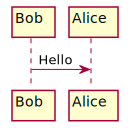

In [25]:
iplantuml.plantuml("","Bob->Alice: Hello")

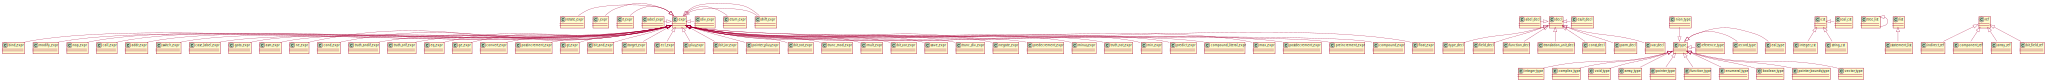

In [27]:

iplantuml.plantuml("","\n".join([ classnames2[k]  + "<|--" + k  for k in classnames2]) )

In [49]:
baseclass = [ classnames2[k]  + "<|--" + k  for k in classnames2]


In [50]:
fields = [ n[0] + " --> "+ n[2] + " : " + n[1]   for n in counter]

In [54]:
baseclass .extend( fields)

In [59]:
diagram = "\n".join(baseclass)

In [61]:
with open("test.puml","w") as of:
    of.write(diagram) 

In [62]:
import pprint
pprint.pprint(fields)

['type_decl --> identifier_node : name',
 'type_decl --> integer_type : type',
 'type_decl --> type_decl : chain',
 'integer_type --> type_decl : name',
 'integer_type --> integer_cst : size',
 'integer_type --> integer_cst : min',
 'integer_type --> integer_cst : max',
 'integer_cst --> integer_type : type',
 'integer_cst --> type_decl : value',
 'integer_type --> identifier_node : name',
 'integer_cst --> identifier_node : value',
 'integer_cst --> integer_cst : value',
 'integer_cst --> integer_type : value',
 'integer_cst --> field_decl : value',
 'type_decl --> real_type : type',
 'real_type --> type_decl : name',
 'real_type --> integer_cst : size',
 'type_decl --> complex_type : type',
 'complex_type --> type_decl : name',
 'complex_type --> integer_cst : size',
 'type_decl --> void_type : type',
 'void_type --> type_decl : name',
 'type_decl --> array_type : type',
 'array_type --> type_decl : name',
 'array_type --> array_type : unql',
 'array_type --> integer_cst : size',
 'a

In [63]:
display("\n".join([  baseclass, fields]))

TypeError: sequence item 0: expected str instance, list found

In [64]:
%%plantuml 

@startuml
decl<|--type_decl
type<|--integer_type
cst<|--integer_cst
type<|--real_type
type<|--complex_type
type<|--void_type
type<|--array_type
type<|--record_type
type<|--pointer_type
decl<|--field_decl
decl<|--function_decl
type<|--function_type
decl<|--translation_unit_decl
tree_list<|--tree_list
type<|--enumeral_type
decl<|--const_decl
decl<|--parm_decl
expr<|--bind_expr
expr<|--return_expr
expr<|--modify_expr
decl<|--result_decl
expr<|--nop_expr
expr<|--call_expr
expr<|--addr_expr
type<|--union_type
list<|--statement_list
expr<|--switch_expr
expr<|--label_expr
decl<|--label_decl
expr<|--case_label_expr
expr<|--goto_expr
expr<|--asm_expr
ref<|--indirect_ref
type<|--boolean_type
expr<|--ne_expr
decl<|--var_decl
cst<|--string_cst
expr<|--cond_expr
expr<|--truth_andif_expr
expr<|--truth_orif_expr
expr<|--eq_expr
expr<|--lt_expr
expr<|--ge_expr
expr<|--convert_expr
ref<|--component_ref
expr<|--postincrement_expr
expr<|--gt_expr
expr<|--le_expr
expr<|--bit_and_expr
expr<|--target_expr
expr<|--decl_expr
expr<|--plus_expr
expr<|--rshift_expr
expr<|--lshift_expr
expr<|--bit_ior_expr
expr<|--pointer_plus_expr
expr<|--bit_not_expr
expr<|--trunc_mod_expr
expr<|--mult_expr
expr<|--bit_xor_expr
expr<|--save_expr
expr<|--trunc_div_expr
expr<|--negate_expr
expr<|--predecrement_expr
expr<|--minus_expr
expr<|--lrotate_expr
type<|--pointer_bounds_type
ref<|--array_ref
expr<|--truth_not_expr
type<|--vector_type
expr<|--min_expr
expr<|--predict_expr
expr<|--compound_literal_expr
expr<|--max_expr
cst<|--real_cst
expr<|--postdecrement_expr
expr<|--preincrement_expr
expr<|--rdiv_expr
expr<|--compound_expr
expr<|--float_expr
ref<|--bit_field_ref
type<|--reference_type
type_decl --> identifier_node : name
type_decl --> integer_type : type
type_decl --> type_decl : chain
integer_type --> type_decl : name
integer_type --> integer_cst : size
integer_type --> integer_cst : min
integer_type --> integer_cst : max
integer_cst --> integer_type : type
integer_cst --> type_decl : value
integer_type --> identifier_node : name
integer_cst --> identifier_node : value
integer_cst --> integer_cst : value
integer_cst --> integer_type : value
integer_cst --> field_decl : value
type_decl --> real_type : type
real_type --> type_decl : name
real_type --> integer_cst : size
type_decl --> complex_type : type
complex_type --> type_decl : name
complex_type --> integer_cst : size
type_decl --> void_type : type
void_type --> type_decl : name
type_decl --> array_type : type
array_type --> type_decl : name
array_type --> array_type : unql
array_type --> integer_cst : size
array_type --> record_type : elts
array_type --> integer_type : domn
type_decl --> pointer_type : type
integer_cst --> function_decl : value
record_type --> type_decl : name
record_type --> integer_cst : size
record_type --> field_decl : flds
pointer_type --> type_decl : name
pointer_type --> integer_cst : size
pointer_type --> integer_type : ptd
type_decl --> function_decl : chain
type_decl --> record_type : type
field_decl --> identifier_node : name
field_decl --> integer_type : type
field_decl --> record_type : scpe
field_decl --> field_decl : chain
field_decl --> integer_cst : size
field_decl --> integer_cst : bpos
function_decl --> identifier_node : name
function_decl --> identifier_node : mngl
function_decl --> function_type : type
function_decl --> translation_unit_decl : scpe
function_decl --> function_decl : chain
function_type --> integer_cst : size
function_type --> real_type : retn
function_type --> tree_list : prms
translation_unit_decl --> identifier_node : name
field_decl --> pointer_type : type
tree_list --> real_type : valu
tree_list --> tree_list : chan
pointer_type --> void_type : ptd
tree_list --> void_type : valu
function_type --> pointer_type : retn
tree_list --> integer_type : valu
integer_type --> integer_type : unql
type_decl --> translation_unit_decl : scpe
record_type --> identifier_node : name
type_decl --> enumeral_type : type
type_decl --> const_decl : chain
enumeral_type --> identifier_node : name
enumeral_type --> integer_cst : size
enumeral_type --> integer_cst : min
enumeral_type --> integer_cst : max
enumeral_type --> tree_list : csts
const_decl --> identifier_node : name
const_decl --> enumeral_type : type
const_decl --> translation_unit_decl : scpe
const_decl --> const_decl : chain
const_decl --> integer_cst : cnst
tree_list --> identifier_node : purp
tree_list --> integer_cst : valu
const_decl --> type_decl : chain
field_decl --> enumeral_type : type
field_decl --> array_type : type
array_type --> integer_type : elts
record_type --> record_type : unql
pointer_type --> pointer_type : unql
enumeral_type --> type_decl : name
enumeral_type --> enumeral_type : unql
integer_cst --> record_type : value
field_decl --> record_type : type
integer_cst --> modify_expr : value
array_type --> pointer_type : elts
pointer_type --> record_type : ptd
function_decl --> parm_decl : args
function_decl --> bind_expr : body
function_type --> integer_type : retn
parm_decl --> identifier_node : name
parm_decl --> integer_type : type
parm_decl --> function_decl : scpe
parm_decl --> integer_type : argt
parm_decl --> integer_cst : size
parm_decl --> type_decl : used
bind_expr --> void_type : type
bind_expr --> return_expr : body
return_expr --> void_type : type
return_expr --> modify_expr : expr
modify_expr --> integer_type : type
modify_expr --> result_decl : OP0
modify_expr --> nop_expr : OP1
result_decl --> integer_type : type
result_decl --> function_decl : scpe
result_decl --> integer_cst : size
nop_expr --> integer_type : type
nop_expr --> call_expr : OP0
function_decl --> type_decl : chain
call_expr --> integer_type : type
call_expr --> addr_expr : fn
call_expr --> nop_expr : E0
modify_expr --> parm_decl : OP1
call_expr --> parm_decl : E0
addr_expr --> pointer_type : type
addr_expr --> function_decl : OP0
nop_expr --> parm_decl : OP0
pointer_type --> function_type : ptd
function_type --> function_type : unql
function_type --> void_type : retn
tree_list --> pointer_type : valu
type_decl --> union_type : type
field_decl --> union_type : type
union_type --> integer_cst : size
union_type --> field_decl : flds
field_decl --> union_type : scpe
integer_cst --> const_decl : value
integer_cst --> translation_unit_decl : value
union_type --> type_decl : name
union_type --> union_type : unql
union_type --> identifier_node : name
pointer_type --> pointer_type : ptd
void_type --> void_type : unql
parm_decl --> pointer_type : type
parm_decl --> parm_decl : chain
parm_decl --> pointer_type : argt
bind_expr --> statement_list : body
statement_list --> switch_expr : E0
statement_list --> label_expr : E1
switch_expr --> integer_type : type
switch_expr --> parm_decl : cond
switch_expr --> statement_list : body
label_expr --> void_type : type
label_expr --> label_decl : name
statement_list --> case_label_expr : E0
statement_list --> modify_expr : E1
statement_list --> goto_expr : E2
statement_list --> case_label_expr : E3
statement_list --> modify_expr : E4
statement_list --> goto_expr : E5
statement_list --> case_label_expr : E6
statement_list --> modify_expr : E7
statement_list --> goto_expr : E8
statement_list --> case_label_expr : E9
statement_list --> modify_expr : E10
statement_list --> goto_expr : E11
statement_list --> case_label_expr : E12
statement_list --> asm_expr : E13
statement_list --> call_expr : E14
statement_list --> asm_expr : E15
label_decl --> void_type : type
label_decl --> function_decl : scpe
integer_cst --> bind_expr : value
modify_expr --> pointer_type : type
modify_expr --> call_expr : OP1
case_label_expr --> void_type : type
case_label_expr --> label_decl : name
case_label_expr --> integer_cst : low
modify_expr --> indirect_ref : OP0
modify_expr --> indirect_ref : OP1
goto_expr --> void_type : type
goto_expr --> label_decl : labl
asm_expr --> void_type : type
call_expr --> pointer_type : type
call_expr --> nop_expr : E1
call_expr --> nop_expr : E2
result_decl --> pointer_type : type
call_expr --> integer_cst : E0
call_expr --> parm_decl : E1
indirect_ref --> integer_type : type
indirect_ref --> nop_expr : OP0
nop_expr --> pointer_type : type
function_type --> boolean_type : retn
boolean_type --> type_decl : name
boolean_type --> integer_cst : size
type_decl --> boolean_type : type
modify_expr --> boolean_type : type
modify_expr --> ne_expr : OP1
function_decl --> var_decl : chain
result_decl --> boolean_type : type
ne_expr --> boolean_type : type
ne_expr --> call_expr : OP0
ne_expr --> integer_cst : OP1
var_decl --> identifier_node : name
var_decl --> pointer_type : type
var_decl --> translation_unit_decl : scpe
var_decl --> var_decl : chain
var_decl --> integer_cst : size
call_expr --> call_expr : E0
integer_cst --> pointer_type : type
var_decl --> function_decl : chain
call_expr --> integer_cst : E1
call_expr --> parm_decl : E2
call_expr --> parm_decl : E3
nop_expr --> addr_expr : OP0
call_expr --> call_expr : E3
addr_expr --> string_cst : OP0
function_type --> record_type : retn
pointer_type --> array_type : ptd
string_cst --> array_type : type
tree_list --> boolean_type : valu
call_expr --> integer_cst : E3
statement_list --> cond_expr : E0
statement_list --> return_expr : E1
call_expr --> call_expr : E2
cond_expr --> void_type : type
cond_expr --> truth_andif_expr : OP0
cond_expr --> return_expr : OP1
truth_andif_expr --> integer_type : type
truth_andif_expr --> ne_expr : OP0
truth_andif_expr --> truth_orif_expr : OP1
integer_cst --> tree_list : value
ne_expr --> integer_type : type
truth_orif_expr --> integer_type : type
truth_orif_expr --> eq_expr : OP0
truth_orif_expr --> lt_expr : OP1
eq_expr --> integer_type : type
eq_expr --> call_expr : OP0
eq_expr --> integer_cst : OP1
lt_expr --> integer_type : type
lt_expr --> call_expr : OP0
lt_expr --> nop_expr : OP1
modify_expr --> cond_expr : OP1
type_decl --> function_type : type
cond_expr --> integer_type : type
cond_expr --> ne_expr : OP0
cond_expr --> call_expr : OP1
cond_expr --> nop_expr : OP2
function_type --> type_decl : name
nop_expr --> nop_expr : OP0
call_expr --> ge_expr : E0
nop_expr --> convert_expr : OP0
nop_expr --> modify_expr : OP0
ge_expr --> integer_type : type
ge_expr --> component_ref : OP0
ge_expr --> component_ref : OP1
convert_expr --> integer_type : type
convert_expr --> parm_decl : OP0
modify_expr --> convert_expr : OP1
statement_list --> cond_expr : E1
statement_list --> cond_expr : E2
statement_list --> return_expr : E3
component_ref --> pointer_type : type
component_ref --> indirect_ref : OP0
component_ref --> field_decl : OP1
indirect_ref --> postincrement_expr : OP0
cond_expr --> gt_expr : OP0
cond_expr --> statement_list : OP1
cond_expr --> le_expr : OP0
integer_cst --> return_expr : value
indirect_ref --> record_type : type
indirect_ref --> parm_decl : OP0
postincrement_expr --> pointer_type : type
postincrement_expr --> component_ref : OP0
postincrement_expr --> integer_cst : OP1
gt_expr --> integer_type : type
gt_expr --> call_expr : OP0
gt_expr --> integer_cst : OP1
call_expr --> void_type : type
le_expr --> integer_type : type
le_expr --> call_expr : OP0
le_expr --> integer_cst : OP1
truth_andif_expr --> truth_orif_expr : OP0
truth_andif_expr --> le_expr : OP1
statement_list --> call_expr : E0
truth_orif_expr --> ne_expr : OP0
truth_orif_expr --> eq_expr : OP1
ne_expr --> bit_and_expr : OP0
eq_expr --> bit_and_expr : OP0
statement_list --> modify_expr : E0
bit_and_expr --> integer_type : type
bit_and_expr --> parm_decl : OP0
bit_and_expr --> integer_cst : OP1
bind_expr --> call_expr : body
statement_list --> modify_expr : E2
statement_list --> modify_expr : E3
modify_expr --> component_ref : OP0
call_expr --> component_ref : E2
call_expr --> component_ref : E1
statement_list --> target_expr : E1
call_expr --> component_ref : E0
target_expr --> pointer_type : type
target_expr --> var_decl : decl
target_expr --> bind_expr : init
var_decl --> array_type : type
var_decl --> type_decl : used
bind_expr --> type_decl : vars
modify_expr --> real_type : type
integer_cst --> pointer_type : value
modify_expr --> integer_cst : OP1
type_decl --> function_decl : scpe
type_decl --> var_decl : chain
statement_list --> decl_expr : E0
statement_list --> call_expr : E1
result_decl --> real_type : type
call_expr --> real_type : type
modify_expr --> component_ref : OP1
var_decl --> union_type : type
var_decl --> function_decl : scpe
var_decl --> constructor : init
decl_expr --> void_type : type
call_expr --> integer_cst : E2
modify_expr --> void_type : type
modify_expr --> var_decl : OP0
convert_expr --> call_expr : OP0
tree_list --> union_type : valu
component_ref --> var_decl : OP0
call_expr --> var_decl : E1
indirect_ref --> component_ref : OP0
addr_expr --> component_ref : OP0
integer_cst --> union_type : value
component_ref --> array_type : type
call_expr --> var_decl : E0
bind_expr --> var_decl : vars
modify_expr --> eq_expr : OP1
var_decl --> component_ref : init
eq_expr --> nop_expr : OP0
eq_expr --> parm_decl : OP1
nop_expr --> component_ref : OP0
cond_expr --> eq_expr : OP0
modify_expr --> truth_andif_expr : OP1
indirect_ref --> var_decl : OP0
statement_list --> modify_expr : E5
statement_list --> modify_expr : E6
truth_andif_expr --> eq_expr : OP0
truth_andif_expr --> eq_expr : OP1
modify_expr --> var_decl : OP1
eq_expr --> var_decl : OP1
bind_expr --> cond_expr : body
statement_list --> decl_expr : E1
cond_expr --> call_expr : OP2
eq_expr --> component_ref : OP0
eq_expr --> component_ref : OP1
nop_expr --> var_decl : OP0
call_expr --> parm_decl : E4
call_expr --> call_expr : E5
truth_andif_expr --> truth_andif_expr : OP1
eq_expr --> parm_decl : OP0
truth_andif_expr --> ne_expr : OP1
call_expr --> call_expr : E4
ne_expr --> component_ref : OP0
ne_expr --> parm_decl : OP1
ne_expr --> parm_decl : OP0
statement_list --> target_expr : E2
statement_list --> cond_expr : E3
cond_expr --> modify_expr : OP1
ne_expr --> var_decl : OP0
modify_expr --> addr_expr : OP1
bind_expr --> modify_expr : body
cond_expr --> lt_expr : OP0
indirect_ref --> pointer_type : type
call_expr --> parm_decl : E5
tree_list --> record_type : valu
eq_expr --> boolean_type : type
eq_expr --> addr_expr : OP1
var_decl --> integer_type : type
var_decl --> integer_cst : init
statement_list --> cond_expr : E4
statement_list --> cond_expr : E5
statement_list --> cond_expr : E6
statement_list --> return_expr : E7
cond_expr --> ge_expr : OP0
modify_expr --> plus_expr : OP1
ge_expr --> nop_expr : OP0
ge_expr --> integer_cst : OP1
modify_expr --> parm_decl : OP0
modify_expr --> rshift_expr : OP1
plus_expr --> integer_type : type
plus_expr --> var_decl : OP0
plus_expr --> integer_cst : OP1
modify_expr --> lshift_expr : OP1
rshift_expr --> integer_type : type
rshift_expr --> parm_decl : OP0
rshift_expr --> integer_cst : OP1
lshift_expr --> integer_type : type
lshift_expr --> parm_decl : OP0
lshift_expr --> integer_cst : OP1
nop_expr --> plus_expr : OP0
plus_expr --> convert_expr : OP0
modify_expr --> bit_ior_expr : OP1
call_expr --> addr_expr : E3
modify_expr --> bit_and_expr : OP1
indirect_ref --> pointer_plus_expr : OP0
bit_ior_expr --> integer_type : type
bit_ior_expr --> indirect_ref : OP0
bit_ior_expr --> lshift_expr : OP1
pointer_type --> union_type : ptd
call_expr --> addr_expr : E4
addr_expr --> parm_decl : OP0
var_decl --> lshift_expr : init
bit_and_expr --> indirect_ref : OP0
bit_and_expr --> bit_not_expr : OP1
pointer_plus_expr --> pointer_type : type
pointer_plus_expr --> parm_decl : OP0
pointer_plus_expr --> nop_expr : OP1
lshift_expr --> integer_cst : OP0
lshift_expr --> trunc_mod_expr : OP1
var_decl --> pointer_plus_expr : init
bit_not_expr --> integer_type : type
bit_not_expr --> lshift_expr : OP0
nop_expr --> mult_expr : OP0
trunc_mod_expr --> integer_type : type
trunc_mod_expr --> parm_decl : OP0
trunc_mod_expr --> integer_cst : OP1
pointer_plus_expr --> nop_expr : OP0
bit_ior_expr --> var_decl : OP1
mult_expr --> integer_type : type
mult_expr --> nop_expr : OP0
mult_expr --> integer_cst : OP1
statement_list --> decl_expr : E2
statement_list --> return_expr : E4
modify_expr --> bit_xor_expr : OP1
nop_expr --> save_expr : OP0
nop_expr --> indirect_ref : OP0
bit_xor_expr --> integer_type : type
bit_xor_expr --> indirect_ref : OP0
bit_xor_expr --> var_decl : OP1
bit_not_expr --> var_decl : OP0
save_expr --> integer_type : type
save_expr --> trunc_div_expr : OP0
var_decl --> indirect_ref : init
bit_ior_expr --> var_decl : OP0
nop_expr --> trunc_div_expr : OP0
trunc_div_expr --> integer_type : type
trunc_div_expr --> parm_decl : OP0
trunc_div_expr --> integer_cst : OP1
nop_expr --> postincrement_expr : OP0
bit_and_expr --> bit_not_expr : OP0
bit_and_expr --> var_decl : OP1
bit_xor_expr --> var_decl : OP0
bit_and_expr --> var_decl : OP0
call_expr --> call_expr : E1
bit_and_expr --> nop_expr : OP0
cond_expr --> truth_orif_expr : OP0
cond_expr --> integer_cst : OP0
cond_expr --> nop_expr : OP1
nop_expr --> rshift_expr : OP0
truth_orif_expr --> le_expr : OP1
gt_expr --> nop_expr : OP0
gt_expr --> call_expr : OP1
rshift_expr --> indirect_ref : OP0
rshift_expr --> bit_and_expr : OP1
le_expr --> parm_decl : OP0
bit_ior_expr --> lshift_expr : OP0
bit_ior_expr --> rshift_expr : OP1
plus_expr --> plus_expr : OP0
plus_expr --> plus_expr : OP1
lshift_expr --> parm_decl : OP1
statement_list --> return_expr : E2
bit_and_expr --> negate_expr : OP0
call_expr --> convert_expr : E0
plus_expr --> nop_expr : OP0
plus_expr --> nop_expr : OP1
cond_expr --> bind_expr : OP1
negate_expr --> integer_type : type
negate_expr --> parm_decl : OP0
truth_andif_expr --> truth_andif_expr : OP0
plus_expr --> ne_expr : OP1
le_expr --> mult_expr : OP0
var_decl --> mult_expr : init
statement_list --> goto_expr : E3
statement_list --> label_expr : E4
statement_list --> bind_expr : E5
statement_list --> predecrement_expr : E6
statement_list --> label_expr : E7
statement_list --> cond_expr : E8
statement_list --> label_expr : E9
statement_list --> return_expr : E10
truth_orif_expr --> truth_orif_expr : OP0
truth_orif_expr --> gt_expr : OP1
le_expr --> bit_ior_expr : OP0
mult_expr --> parm_decl : OP0
mult_expr --> parm_decl : OP1
var_decl --> nop_expr : init
predecrement_expr --> integer_type : type
predecrement_expr --> var_decl : OP0
predecrement_expr --> integer_cst : OP1
cond_expr --> goto_expr : OP1
cond_expr --> goto_expr : OP2
gt_expr --> bit_ior_expr : OP0
pointer_type --> real_type : ptd
bit_ior_expr --> parm_decl : OP0
bit_ior_expr --> parm_decl : OP1
eq_expr --> var_decl : OP0
var_decl --> call_expr : init
convert_expr --> var_decl : OP0
trunc_div_expr --> nop_expr : OP0
trunc_div_expr --> nop_expr : OP1
postincrement_expr --> var_decl : OP0
nop_expr --> minus_expr : OP0
tree_list --> enumeral_type : valu
plus_expr --> ne_expr : OP0
minus_expr --> integer_type : type
minus_expr --> convert_expr : OP0
minus_expr --> nop_expr : OP1
bit_and_expr --> component_ref : OP0
component_ref --> integer_type : type
gt_expr --> mult_expr : OP0
lt_expr --> parm_decl : OP0
lt_expr --> integer_cst : OP1
function_type --> enumeral_type : retn
pointer_type --> enumeral_type : ptd
statement_list --> decl_expr : E3
statement_list --> decl_expr : E4
statement_list --> goto_expr : E7
statement_list --> label_expr : E8
statement_list --> modify_expr : E9
statement_list --> modify_expr : E11
statement_list --> cond_expr : E12
statement_list --> label_expr : E13
statement_list --> cond_expr : E14
statement_list --> label_expr : E15
statement_list --> return_expr : E16
modify_expr --> trunc_div_expr : OP1
modify_expr --> pointer_plus_expr : OP1
cond_expr --> cond_expr : OP2
trunc_div_expr --> plus_expr : OP0
call_expr --> parm_decl : fn
lt_expr --> var_decl : OP0
cond_expr --> return_expr : OP2
lt_expr --> var_decl : OP1
plus_expr --> var_decl : OP1
gt_expr --> var_decl : OP0
mult_expr --> var_decl : OP0
bind_expr --> asm_expr : body
bind_expr --> bind_expr : body
nop_expr --> target_expr : OP0
target_expr --> integer_type : type
statement_list --> asm_expr : E1
modify_expr --> target_expr : OP1
call_expr --> addr_expr : E0
statement_list --> bind_expr : E3
statement_list --> cond_expr : E7
statement_list --> modify_expr : E8
statement_list --> cond_expr : E9
statement_list --> label_expr : E12
statement_list --> bind_expr : E13
statement_list --> return_expr : E14
component_ref --> record_type : type
var_decl --> parm_decl : init
var_decl --> string_cst : init
statement_list --> bind_expr : E1
statement_list --> return_expr : E13
integer_cst --> real_type : value
switch_expr --> integer_cst : cond
modify_expr --> minus_expr : OP1
call_expr --> eq_expr : E0
nop_expr --> void_type : type
nop_expr --> integer_cst : OP0
call_expr --> nop_expr : E3
integer_cst --> boolean_type : type
statement_list --> case_label_expr : E2
statement_list --> case_label_expr : E4
statement_list --> bind_expr : E7
statement_list --> case_label_expr : E8
statement_list --> call_expr : E9
minus_expr --> var_decl : OP0
minus_expr --> parm_decl : OP1
gt_expr --> var_decl : OP1
statement_list --> bind_expr : E0
call_expr --> boolean_type : type
addr_expr --> var_decl : OP0
lt_expr --> trunc_div_expr : OP0
le_expr --> var_decl : OP0
le_expr --> var_decl : OP1
trunc_div_expr --> call_expr : OP0
call_expr --> trunc_div_expr : E3
minus_expr --> component_ref : OP0
minus_expr --> component_ref : OP1
nop_expr --> bit_ior_expr : OP0
bit_ior_expr --> nop_expr : OP0
bit_ior_expr --> nop_expr : OP1
bit_ior_expr --> bit_ior_expr : OP0
nop_expr --> lshift_expr : OP0
nop_expr --> lrotate_expr : OP0
bit_ior_expr --> bit_and_expr : OP1
rshift_expr --> nop_expr : OP0
lshift_expr --> nop_expr : OP0
lrotate_expr --> integer_type : type
lrotate_expr --> nop_expr : OP0
lrotate_expr --> integer_cst : OP1
bit_and_expr --> rshift_expr : OP0
bit_ior_expr --> bit_and_expr : OP0
bit_and_expr --> lshift_expr : OP0
call_expr --> indirect_ref : E0
var_decl --> boolean_type : type
integer_cst --> complex_type : value
var_decl --> record_type : type
field_decl --> boolean_type : type
integer_cst --> function_type : value
integer_cst --> array_type : value
integer_cst --> addr_expr : value
tree_list --> pointer_bounds_type : valu
pointer_bounds_type --> identifier_node : name
pointer_bounds_type --> integer_cst : size
integer_cst --> void_type : value
field_decl --> real_type : type
function_type --> pointer_bounds_type : retn
integer_cst --> call_expr : value
integer_cst --> eq_expr : value
parm_decl --> boolean_type : type
integer_cst --> enumeral_type : type
component_ref --> boolean_type : type
integer_cst --> ne_expr : value
integer_cst --> parm_decl : value
integer_cst --> result_decl : value
convert_expr --> component_ref : OP0
addr_expr --> array_ref : OP0
array_ref --> integer_type : type
array_ref --> component_ref : OP0
array_ref --> plus_expr : OP1
plus_expr --> mult_expr : OP0
plus_expr --> mult_expr : OP1
mult_expr --> component_ref : OP1
statement_list --> bind_expr : E2
statement_list --> return_expr : E5
cond_expr --> integer_cst : OP2
gt_expr --> component_ref : OP0
gt_expr --> parm_decl : OP1
pointer_plus_expr --> component_ref : OP0
plus_expr --> minus_expr : OP0
minus_expr --> nop_expr : OP0
integer_cst --> plus_expr : value
const_decl --> function_decl : chain
integer_cst --> nop_expr : value
statement_list --> return_expr : E9
statement_list --> case_label_expr : E10
statement_list --> return_expr : E11
statement_list --> case_label_expr : E14
statement_list --> return_expr : E15
statement_list --> case_label_expr : E16
statement_list --> return_expr : E17
statement_list --> case_label_expr : E18
statement_list --> return_expr : E19
statement_list --> case_label_expr : E20
statement_list --> return_expr : E21
statement_list --> case_label_expr : E22
statement_list --> return_expr : E23
statement_list --> case_label_expr : E24
statement_list --> return_expr : E25
statement_list --> case_label_expr : E26
statement_list --> return_expr : E27
statement_list --> case_label_expr : E28
statement_list --> return_expr : E29
statement_list --> case_label_expr : E30
statement_list --> return_expr : E31
statement_list --> case_label_expr : E32
statement_list --> return_expr : E33
statement_list --> case_label_expr : E34
statement_list --> return_expr : E35
statement_list --> case_label_expr : E36
statement_list --> return_expr : E37
statement_list --> case_label_expr : E38
statement_list --> return_expr : E39
statement_list --> case_label_expr : E40
statement_list --> return_expr : E41
statement_list --> case_label_expr : E42
statement_list --> return_expr : E43
statement_list --> case_label_expr : E44
statement_list --> return_expr : E45
statement_list --> case_label_expr : E46
statement_list --> return_expr : E47
statement_list --> case_label_expr : E48
statement_list --> case_label_expr : E49
statement_list --> return_expr : E50
statement_list --> case_label_expr : E51
statement_list --> case_label_expr : E52
statement_list --> return_expr : E53
statement_list --> case_label_expr : E54
statement_list --> case_label_expr : E55
statement_list --> return_expr : E56
statement_list --> case_label_expr : E57
statement_list --> case_label_expr : E58
statement_list --> return_expr : E59
statement_list --> case_label_expr : E60
statement_list --> case_label_expr : E61
statement_list --> return_expr : E62
statement_list --> case_label_expr : E63
statement_list --> case_label_expr : E64
statement_list --> return_expr : E65
statement_list --> case_label_expr : E66
statement_list --> case_label_expr : E67
statement_list --> return_expr : E68
statement_list --> case_label_expr : E69
statement_list --> case_label_expr : E70
statement_list --> return_expr : E71
statement_list --> case_label_expr : E72
statement_list --> case_label_expr : E73
statement_list --> return_expr : E74
statement_list --> case_label_expr : E75
statement_list --> case_label_expr : E76
statement_list --> return_expr : E77
statement_list --> case_label_expr : E78
statement_list --> case_label_expr : E79
statement_list --> return_expr : E80
statement_list --> case_label_expr : E81
statement_list --> case_label_expr : E82
statement_list --> return_expr : E83
statement_list --> case_label_expr : E84
statement_list --> case_label_expr : E85
statement_list --> return_expr : E86
statement_list --> case_label_expr : E87
statement_list --> case_label_expr : E88
statement_list --> return_expr : E89
statement_list --> case_label_expr : E90
statement_list --> case_label_expr : E91
statement_list --> return_expr : E92
statement_list --> case_label_expr : E93
statement_list --> case_label_expr : E94
statement_list --> return_expr : E95
statement_list --> case_label_expr : E96
statement_list --> return_expr : E97
statement_list --> asm_expr : E2
integer_cst --> bit_and_expr : value
return_expr --> call_expr : expr
call_expr --> component_ref : fn
integer_cst --> enumeral_type : value
tree_list --> complex_type : valu
function_type --> complex_type : retn
statement_list --> asm_expr : E0
indirect_ref --> call_expr : OP0
nop_expr --> boolean_type : type
nop_expr --> truth_andif_expr : OP0
var_decl --> target_expr : init
component_ref --> component_ref : OP0
eq_expr --> indirect_ref : OP0
cond_expr --> nop_expr : OP0
nop_expr --> truth_not_expr : OP0
truth_not_expr --> boolean_type : type
truth_not_expr --> component_ref : OP0
truth_andif_expr --> gt_expr : OP1
modify_expr --> array_ref : OP1
tree_list --> vector_type : valu
function_type --> vector_type : retn
array_ref --> parm_decl : OP1
le_expr --> component_ref : OP0
array_type --> array_type : elts
vector_type --> integer_cst : size
lt_expr --> component_ref : OP0
lt_expr --> parm_decl : OP1
real_type --> real_type : unql
nop_expr --> truth_orif_expr : OP0
pointer_type --> vector_type : ptd
vector_type --> vector_type : unql
eq_expr --> array_ref : OP0
array_ref --> integer_cst : OP1
pointer_plus_expr --> integer_cst : OP1
statement_list --> call_expr : E2
call_expr --> addr_expr : E1
call_expr --> var_decl : E3
call_expr --> ne_expr : E0
truth_orif_expr --> ne_expr : OP1
truth_andif_expr --> nop_expr : OP0
truth_andif_expr --> nop_expr : OP1
truth_orif_expr --> truth_andif_expr : OP1
truth_not_expr --> call_expr : OP0
pointer_type --> boolean_type : ptd
pointer_plus_expr --> negate_expr : OP1
negate_expr --> nop_expr : OP0
bind_expr --> convert_expr : body
convert_expr --> void_type : type
var_decl --> type_decl : chain
nop_expr --> array_ref : OP0
array_ref --> var_decl : OP0
array_ref --> nop_expr : OP1
statement_list --> goto_expr : E4
statement_list --> label_expr : E5
statement_list --> cond_expr : E11
statement_list --> call_expr : E12
statement_list --> modify_expr : E13
statement_list --> goto_expr : E6
statement_list --> postincrement_expr : E10
statement_list --> label_expr : E11
call_expr --> pointer_plus_expr : E0
ne_expr --> nop_expr : OP0
ne_expr --> nop_expr : OP1
postincrement_expr --> integer_type : type
gt_expr --> plus_expr : OP0
lshift_expr --> var_decl : OP0
lt_expr --> minus_expr : OP0
lt_expr --> nop_expr : OP0
lt_expr --> trunc_div_expr : OP1
cond_expr --> convert_expr : OP1
bit_and_expr --> plus_expr : OP0
nop_expr --> pointer_plus_expr : OP0
statement_list --> convert_expr : E2
pointer_plus_expr --> var_decl : OP0
var_decl --> var_decl : init
convert_expr --> integer_cst : OP0
plus_expr --> component_ref : OP0
plus_expr --> parm_decl : OP1
nop_expr --> min_expr : OP0
min_expr --> integer_type : type
min_expr --> var_decl : OP0
min_expr --> integer_cst : OP1
statement_list --> call_expr : E6
statement_list --> postincrement_expr : E15
statement_list --> label_expr : E16
statement_list --> cond_expr : E17
statement_list --> label_expr : E18
statement_list --> modify_expr : E19
statement_list --> modify_expr : E20
statement_list --> call_expr : E8
call_expr --> pointer_plus_expr : E1
statement_list --> call_expr : E5
call_expr --> minus_expr : E2
ne_expr --> target_expr : OP0
minus_expr --> parm_decl : OP0
call_expr --> integer_cst : E4
var_decl --> ne_expr : init
statement_list --> decl_expr : E5
statement_list --> decl_expr : E6
statement_list --> goto_expr : E10
statement_list --> modify_expr : E12
statement_list --> cond_expr : E13
statement_list --> label_expr : E14
statement_list --> cond_expr : E15
statement_list --> modify_expr : E18
statement_list --> cond_expr : E20
statement_list --> modify_expr : E21
statement_list --> cond_expr : E22
statement_list --> modify_expr : E23
statement_list --> goto_expr : E24
statement_list --> label_expr : E25
statement_list --> cond_expr : E26
statement_list --> postincrement_expr : E27
statement_list --> label_expr : E28
statement_list --> cond_expr : E29
statement_list --> label_expr : E30
statement_list --> modify_expr : E31
statement_list --> label_expr : E32
statement_list --> call_expr : E33
statement_list --> call_expr : E34
component_ref --> array_ref : OP0
var_decl --> label_decl : chain
statement_list --> goto_expr : E1
ne_expr --> indirect_ref : OP0
label_decl --> identifier_node : name
call_expr --> mult_expr : E1
array_ref --> record_type : type
statement_list --> cond_expr : E10
statement_list --> goto_expr : E12
statement_list --> modify_expr : E14
statement_list --> modify_expr : E16
statement_list --> modify_expr : E17
statement_list --> cond_expr : E18
statement_list --> label_expr : E24
statement_list --> cond_expr : E25
statement_list --> label_expr : E26
statement_list --> label_expr : E2
statement_list --> postincrement_expr : E4
call_expr --> var_decl : E2
statement_list --> postincrement_expr : E5
statement_list --> label_expr : E6
mult_expr --> trunc_div_expr : OP0
statement_list --> postincrement_expr : E16
statement_list --> label_expr : E17
statement_list --> label_expr : E19
statement_list --> return_expr : E20
ne_expr --> modify_expr : OP0
statement_list --> goto_expr : E9
statement_list --> label_expr : E10
statement_list --> postincrement_expr : E13
statement_list --> goto_expr : E20
statement_list --> label_expr : E21
statement_list --> modify_expr : E22
statement_list --> cond_expr : E23
statement_list --> postincrement_expr : E24
statement_list --> label_expr : E27
statement_list --> modify_expr : E28
statement_list --> modify_expr : E30
statement_list --> goto_expr : E31
statement_list --> modify_expr : E33
statement_list --> cond_expr : E34
statement_list --> modify_expr : E35
statement_list --> cond_expr : E36
statement_list --> postincrement_expr : E37
statement_list --> label_expr : E38
statement_list --> cond_expr : E39
statement_list --> label_expr : E40
statement_list --> label_expr : E41
statement_list --> call_expr : E42
call_expr --> mult_expr : E2
ne_expr --> pointer_plus_expr : OP0
ne_expr --> var_decl : OP1
statement_list --> goto_expr : E0
modify_expr --> modify_expr : OP1
statement_list --> call_expr : E16
statement_list --> call_expr : E17
statement_list --> return_expr : E18
call_expr --> indirect_ref : E1
bit_and_expr --> bit_and_expr : OP0
bit_and_expr --> cond_expr : OP1
statement_list --> bind_expr : E10
statement_list --> postincrement_expr : E11
statement_list --> modify_expr : E15
cond_expr --> modify_expr : OP2
call_expr --> array_ref : E1
ge_expr --> var_decl : OP0
bit_and_expr --> nop_expr : OP1
cond_expr --> plus_expr : OP1
statement_list --> postincrement_expr : E6
statement_list --> cond_expr : E16
statement_list --> return_expr : E22
array_ref --> pointer_type : type
array_ref --> var_decl : OP1
plus_expr --> lshift_expr : OP0
var_decl --> addr_expr : init
lshift_expr --> bit_and_expr : OP1
statement_list --> predict_expr : E0
call_expr --> addr_expr : E2
predict_expr --> void_type : type
var_decl --> cond_expr : init
cond_expr --> pointer_type : type
cond_expr --> bind_expr : OP2
ne_expr --> save_expr : OP0
var_decl --> convert_expr : init
statement_list --> call_expr : E4
statement_list --> bind_expr : E11
save_expr --> pointer_type : type
save_expr --> component_ref : OP0
convert_expr --> trunc_div_expr : OP0
statement_list --> call_expr : E7
gt_expr --> parm_decl : OP0
eq_expr --> nop_expr : OP1
mult_expr --> plus_expr : OP0
statement_list --> call_expr : E11
statement_list --> call_expr : E13
statement_list --> call_expr : E15
statement_list --> call_expr : E19
statement_list --> call_expr : E23
statement_list --> cond_expr : E24
statement_list --> modify_expr : E25
statement_list --> modify_expr : E26
call_expr --> component_ref : E3
call_expr --> component_ref : E4
call_expr --> component_ref : E5
call_expr --> nop_expr : E4
ne_expr --> component_ref : OP1
call_expr --> plus_expr : E2
statement_list --> goto_expr : E13
statement_list --> bind_expr : E15
statement_list --> postincrement_expr : E20
statement_list --> label_expr : E23
statement_list --> return_expr : E26
statement_list --> label_expr : E20
statement_list --> goto_expr : E22
statement_list --> call_expr : E24
statement_list --> postincrement_expr : E25
statement_list --> cond_expr : E27
call_expr --> bit_and_expr : E0
nop_expr --> bit_not_expr : OP0
statement_list --> postincrement_expr : E9
bit_not_expr --> indirect_ref : OP0
statement_list --> decl_expr : E7
statement_list --> decl_expr : E8
statement_list --> decl_expr : E9
statement_list --> call_expr : E18
statement_list --> bind_expr : E22
statement_list --> postincrement_expr : E23
statement_list --> call_expr : E27
statement_list --> cond_expr : E28
statement_list --> modify_expr : E34
cond_expr --> cond_expr : OP1
statement_list --> postincrement_expr : E14
statement_list --> call_expr : E26
modify_expr --> record_type : type
statement_list --> goto_expr : E21
statement_list --> label_expr : E22
statement_list --> modify_expr : E24
statement_list --> label_expr : E29
statement_list --> cond_expr : E30
statement_list --> cond_expr : E32
statement_list --> call_expr : E35
statement_list --> modify_expr : E36
statement_list --> cond_expr : E37
statement_list --> call_expr : E38
plus_expr --> component_ref : OP1
modify_expr --> compound_literal_expr : OP1
statement_list --> postincrement_expr : E17
statement_list --> cond_expr : E19
statement_list --> call_expr : E21
label_decl --> label_decl : chain
modify_expr --> negate_expr : OP1
compound_literal_expr --> record_type : type
trunc_div_expr --> component_ref : OP0
trunc_div_expr --> component_ref : OP1
call_expr --> var_decl : E4
negate_expr --> indirect_ref : OP0
statement_list --> goto_expr : E17
statement_list --> bind_expr : E19
var_decl --> eq_expr : init
statement_list --> goto_expr : E15
statement_list --> cond_expr : E21
statement_list --> call_expr : E25
minus_expr --> convert_expr : OP1
statement_list --> call_expr : E28
modify_expr --> max_expr : OP1
statement_list --> call_expr : E10
statement_list --> call_expr : E22
statement_list --> modify_expr : E29
statement_list --> cond_expr : E31
statement_list --> modify_expr : E37
call_expr --> postincrement_expr : E0
statement_list --> label_expr : E3
modify_expr --> enumeral_type : type
max_expr --> integer_type : type
max_expr --> var_decl : OP0
max_expr --> var_decl : OP1
truth_andif_expr --> lt_expr : OP1
component_ref --> enumeral_type : type
statement_list --> return_expr : E28
bit_and_expr --> negate_expr : OP1
minus_expr --> var_decl : OP1
statement_list --> predict_expr : E1
statement_list --> return_expr : E8
mult_expr --> postincrement_expr : OP0
call_expr --> convert_expr : E3
var_decl --> ge_expr : init
call_expr --> convert_expr : E1
truth_orif_expr --> nop_expr : OP0
boolean_type --> boolean_type : unql
cond_expr --> integer_cst : OP1
statement_list --> call_expr : E3
statement_list --> postincrement_expr : E8
ge_expr --> parm_decl : OP1
call_expr --> convert_expr : E4
call_expr --> minus_expr : E3
ne_expr --> real_cst : OP1
statement_list --> postincrement_expr : E12
statement_list --> goto_expr : E19
ne_expr --> array_ref : OP0
component_ref --> real_type : type
real_cst --> real_type : type
call_expr --> plus_expr : E0
call_expr --> indirect_ref : E2
indirect_ref --> union_type : type
mult_expr --> component_ref : OP0
pointer_plus_expr --> plus_expr : OP1
postincrement_expr --> indirect_ref : OP0
statement_list --> bind_expr : E8
statement_list --> goto_expr : E14
statement_list --> call_expr : E20
statement_list --> postincrement_expr : E21
statement_list --> call_expr : E29
statement_list --> call_expr : E30
statement_list --> postincrement_expr : E22
statement_list --> cond_expr : E35
statement_list --> call_expr : E37
statement_list --> postincrement_expr : E38
statement_list --> label_expr : E39
statement_list --> cond_expr : E40
statement_list --> modify_expr : E42
statement_list --> cond_expr : E43
statement_list --> cond_expr : E44
statement_list --> modify_expr : E45
statement_list --> goto_expr : E46
statement_list --> label_expr : E47
statement_list --> cond_expr : E48
statement_list --> modify_expr : E49
statement_list --> cond_expr : E50
statement_list --> cond_expr : E51
statement_list --> modify_expr : E52
statement_list --> postincrement_expr : E53
statement_list --> label_expr : E54
statement_list --> cond_expr : E55
statement_list --> label_expr : E56
statement_list --> return_expr : E57
statement_list --> label_expr : E58
statement_list --> call_expr : E59
statement_list --> label_expr : E60
statement_list --> target_expr : E61
statement_list --> postdecrement_expr : E16
statement_list --> postdecrement_expr : E17
statement_list --> modify_expr : E27
statement_list --> goto_expr : E28
statement_list --> cond_expr : E33
statement_list --> label_expr : E34
statement_list --> label_expr : E37
statement_list --> modify_expr : E38
statement_list --> goto_expr : E39
statement_list --> target_expr : E41
statement_list --> postincrement_expr : E42
statement_list --> label_expr : E43
statement_list --> label_expr : E45
statement_list --> call_expr : E46
statement_list --> postincrement_expr : E7
statement_list --> bind_expr : E12
statement_list --> preincrement_expr : E13
statement_list --> preincrement_expr : E12
call_expr --> cond_expr : E2
statement_list --> switch_expr : E10
statement_list --> return_expr : E12
call_expr --> array_ref : E4
indirect_ref --> indirect_ref : OP0
postdecrement_expr --> integer_type : type
postdecrement_expr --> var_decl : OP0
postdecrement_expr --> integer_cst : OP1
modify_expr --> rdiv_expr : OP1
statement_list --> switch_expr : E8
preincrement_expr --> integer_type : type
preincrement_expr --> var_decl : OP0
preincrement_expr --> integer_cst : OP1
statement_list --> target_expr : E5
statement_list --> target_expr : E6
statement_list --> switch_expr : E6
switch_expr --> component_ref : cond
plus_expr --> call_expr : OP0
statement_list --> compound_expr : E1
statement_list --> compound_expr : E6
le_expr --> nop_expr : OP1
statement_list --> target_expr : E0
modify_expr --> mult_expr : OP1
var_decl --> real_type : type
rdiv_expr --> real_type : type
rdiv_expr --> float_expr : OP0
rdiv_expr --> real_cst : OP1
switch_expr --> nop_expr : cond
statement_list --> compound_expr : E18
statement_list --> modify_expr : E32
statement_list --> goto_expr : E35
statement_list --> label_expr : E36
statement_list --> postincrement_expr : E39
statement_list --> cond_expr : E41
statement_list --> label_expr : E42
statement_list --> compound_expr : E44
statement_list --> cond_expr : E46
statement_list --> label_expr : E48
statement_list --> call_expr : E49
statement_list --> label_expr : E51
statement_list --> call_expr : E52
statement_list --> modify_expr : E53
statement_list --> goto_expr : E54
call_expr --> mult_expr : E0
compound_expr --> pointer_type : type
compound_expr --> modify_expr : OP0
compound_expr --> modify_expr : OP1
compound_expr --> postincrement_expr : OP0
compound_expr --> postincrement_expr : OP1
plus_expr --> bit_and_expr : OP0
gt_expr --> nop_expr : OP1
statement_list --> postdecrement_expr : E1
float_expr --> real_type : type
float_expr --> minus_expr : OP0
statement_list --> case_label_expr : E7
compound_expr --> integer_type : type
statement_list --> compound_expr : E2
statement_list --> compound_expr : E5
statement_list --> compound_expr : E8
statement_list --> compound_expr : E12
statement_list --> compound_expr : E17
statement_list --> goto_expr : E18
truth_orif_expr --> ge_expr : OP0
var_decl --> enumeral_type : type
compound_expr --> save_expr : OP0
cond_expr --> compound_expr : OP1
cond_expr --> compound_expr : OP2
eq_expr --> predecrement_expr : OP0
ge_expr --> var_decl : OP1
var_decl --> plus_expr : init
minus_expr --> integer_cst : OP0
call_expr --> convert_expr : E2
minus_expr --> bit_and_expr : OP0
ne_expr --> plus_expr : OP0
save_expr --> call_expr : OP0
le_expr --> plus_expr : OP0
plus_expr --> parm_decl : OP0
bit_and_expr --> bit_field_ref : OP0
plus_expr --> convert_expr : OP1
plus_expr --> save_expr : OP0
bit_field_ref --> integer_type : type
bit_field_ref --> indirect_ref : OP0
bit_field_ref --> integer_cst : OP1
bit_field_ref --> integer_cst : OP2
truth_orif_expr --> le_expr : OP0
call_expr --> convert_expr : E5
call_expr --> parm_decl : E6
modify_expr --> le_expr : OP1
le_expr --> boolean_type : type
array_ref --> bit_and_expr : OP1
modify_expr --> ge_expr : OP1
ge_expr --> boolean_type : type
ge_expr --> parm_decl : OP0
tree_list --> reference_type : valu
reference_type --> integer_cst : size
reference_type --> pointer_type : refd
type_decl --> identifier_node : name
type_decl --> integer_type : type
type_decl --> type_decl : chain
integer_type --> type_decl : name
integer_type --> integer_cst : size
integer_type --> integer_cst : min
integer_type --> integer_cst : max
integer_cst --> integer_type : type
integer_cst --> type_decl : value
integer_type --> identifier_node : name
integer_cst --> identifier_node : value
integer_cst --> integer_cst : value
integer_cst --> integer_type : value
integer_cst --> field_decl : value
type_decl --> real_type : type
real_type --> type_decl : name
real_type --> integer_cst : size
type_decl --> complex_type : type
complex_type --> type_decl : name
complex_type --> integer_cst : size
type_decl --> void_type : type
void_type --> type_decl : name
type_decl --> array_type : type
array_type --> type_decl : name
array_type --> array_type : unql
array_type --> integer_cst : size
array_type --> record_type : elts
array_type --> integer_type : domn
type_decl --> pointer_type : type
integer_cst --> function_decl : value
record_type --> type_decl : name
record_type --> integer_cst : size
record_type --> field_decl : flds
pointer_type --> type_decl : name
pointer_type --> integer_cst : size
pointer_type --> integer_type : ptd
type_decl --> function_decl : chain
type_decl --> record_type : type
field_decl --> identifier_node : name
field_decl --> integer_type : type
field_decl --> record_type : scpe
field_decl --> field_decl : chain
field_decl --> integer_cst : size
field_decl --> integer_cst : bpos
function_decl --> identifier_node : name
function_decl --> identifier_node : mngl
function_decl --> function_type : type
function_decl --> translation_unit_decl : scpe
function_decl --> function_decl : chain
function_type --> integer_cst : size
function_type --> real_type : retn
function_type --> tree_list : prms
translation_unit_decl --> identifier_node : name
field_decl --> pointer_type : type
tree_list --> real_type : valu
tree_list --> tree_list : chan
pointer_type --> void_type : ptd
tree_list --> void_type : valu
function_type --> pointer_type : retn
tree_list --> integer_type : valu
integer_type --> integer_type : unql
type_decl --> translation_unit_decl : scpe
record_type --> identifier_node : name
type_decl --> enumeral_type : type
type_decl --> const_decl : chain
enumeral_type --> identifier_node : name
enumeral_type --> integer_cst : size
enumeral_type --> integer_cst : min
enumeral_type --> integer_cst : max
enumeral_type --> tree_list : csts
const_decl --> identifier_node : name
const_decl --> enumeral_type : type
const_decl --> translation_unit_decl : scpe
const_decl --> const_decl : chain
const_decl --> integer_cst : cnst
tree_list --> identifier_node : purp
tree_list --> integer_cst : valu
const_decl --> type_decl : chain
field_decl --> enumeral_type : type
field_decl --> array_type : type
array_type --> integer_type : elts
record_type --> record_type : unql
pointer_type --> pointer_type : unql
enumeral_type --> type_decl : name
enumeral_type --> enumeral_type : unql
integer_cst --> record_type : value
field_decl --> record_type : type
integer_cst --> modify_expr : value
array_type --> pointer_type : elts
pointer_type --> record_type : ptd
function_decl --> parm_decl : args
function_decl --> bind_expr : body
function_type --> integer_type : retn
parm_decl --> identifier_node : name
parm_decl --> integer_type : type
parm_decl --> function_decl : scpe
parm_decl --> integer_type : argt
parm_decl --> integer_cst : size
parm_decl --> type_decl : used
bind_expr --> void_type : type
bind_expr --> return_expr : body
return_expr --> void_type : type
return_expr --> modify_expr : expr
modify_expr --> integer_type : type
modify_expr --> result_decl : OP0
modify_expr --> nop_expr : OP1
result_decl --> integer_type : type
result_decl --> function_decl : scpe
result_decl --> integer_cst : size
nop_expr --> integer_type : type
nop_expr --> call_expr : OP0
function_decl --> type_decl : chain
call_expr --> integer_type : type
call_expr --> addr_expr : fn
call_expr --> nop_expr : E0
modify_expr --> parm_decl : OP1
call_expr --> parm_decl : E0
addr_expr --> pointer_type : type
addr_expr --> function_decl : OP0
nop_expr --> parm_decl : OP0
pointer_type --> function_type : ptd
function_type --> function_type : unql
function_type --> void_type : retn
tree_list --> pointer_type : valu
type_decl --> union_type : type
field_decl --> union_type : type
union_type --> integer_cst : size
union_type --> field_decl : flds
field_decl --> union_type : scpe
integer_cst --> const_decl : value
integer_cst --> translation_unit_decl : value
union_type --> type_decl : name
union_type --> union_type : unql
union_type --> identifier_node : name
pointer_type --> pointer_type : ptd
void_type --> void_type : unql
parm_decl --> pointer_type : type
parm_decl --> parm_decl : chain
parm_decl --> pointer_type : argt
bind_expr --> statement_list : body
statement_list --> switch_expr : E0
statement_list --> label_expr : E1
switch_expr --> integer_type : type
switch_expr --> parm_decl : cond
switch_expr --> statement_list : body
label_expr --> void_type : type
label_expr --> label_decl : name
statement_list --> case_label_expr : E0
statement_list --> modify_expr : E1
statement_list --> goto_expr : E2
statement_list --> case_label_expr : E3
statement_list --> modify_expr : E4
statement_list --> goto_expr : E5
statement_list --> case_label_expr : E6
statement_list --> modify_expr : E7
statement_list --> goto_expr : E8
statement_list --> case_label_expr : E9
statement_list --> modify_expr : E10
statement_list --> goto_expr : E11
statement_list --> case_label_expr : E12
statement_list --> asm_expr : E13
statement_list --> call_expr : E14
statement_list --> asm_expr : E15
label_decl --> void_type : type
label_decl --> function_decl : scpe
integer_cst --> bind_expr : value
modify_expr --> pointer_type : type
modify_expr --> call_expr : OP1
case_label_expr --> void_type : type
case_label_expr --> label_decl : name
case_label_expr --> integer_cst : low
modify_expr --> indirect_ref : OP0
modify_expr --> indirect_ref : OP1
goto_expr --> void_type : type
goto_expr --> label_decl : labl
asm_expr --> void_type : type
call_expr --> pointer_type : type
call_expr --> nop_expr : E1
call_expr --> nop_expr : E2
result_decl --> pointer_type : type
call_expr --> integer_cst : E0
call_expr --> parm_decl : E1
indirect_ref --> integer_type : type
indirect_ref --> nop_expr : OP0
nop_expr --> pointer_type : type
function_type --> boolean_type : retn
boolean_type --> type_decl : name
boolean_type --> integer_cst : size
type_decl --> boolean_type : type
modify_expr --> boolean_type : type
modify_expr --> ne_expr : OP1
function_decl --> var_decl : chain
result_decl --> boolean_type : type
ne_expr --> boolean_type : type
ne_expr --> call_expr : OP0
ne_expr --> integer_cst : OP1
var_decl --> identifier_node : name
var_decl --> pointer_type : type
var_decl --> translation_unit_decl : scpe
var_decl --> var_decl : chain
var_decl --> integer_cst : size
call_expr --> call_expr : E0
integer_cst --> pointer_type : type
var_decl --> function_decl : chain
call_expr --> integer_cst : E1
call_expr --> parm_decl : E2
call_expr --> parm_decl : E3
nop_expr --> addr_expr : OP0
call_expr --> call_expr : E3
addr_expr --> string_cst : OP0
function_type --> record_type : retn
pointer_type --> array_type : ptd
string_cst --> array_type : type
tree_list --> boolean_type : valu
call_expr --> integer_cst : E3
statement_list --> cond_expr : E0
statement_list --> return_expr : E1
call_expr --> call_expr : E2
cond_expr --> void_type : type
cond_expr --> truth_andif_expr : OP0
cond_expr --> return_expr : OP1
truth_andif_expr --> integer_type : type
truth_andif_expr --> ne_expr : OP0
truth_andif_expr --> truth_orif_expr : OP1
integer_cst --> tree_list : value
ne_expr --> integer_type : type
truth_orif_expr --> integer_type : type
truth_orif_expr --> eq_expr : OP0
truth_orif_expr --> lt_expr : OP1
eq_expr --> integer_type : type
eq_expr --> call_expr : OP0
eq_expr --> integer_cst : OP1
lt_expr --> integer_type : type
lt_expr --> call_expr : OP0
lt_expr --> nop_expr : OP1
modify_expr --> cond_expr : OP1
type_decl --> function_type : type
cond_expr --> integer_type : type
cond_expr --> ne_expr : OP0
cond_expr --> call_expr : OP1
cond_expr --> nop_expr : OP2
function_type --> type_decl : name
nop_expr --> nop_expr : OP0
call_expr --> ge_expr : E0
nop_expr --> convert_expr : OP0
nop_expr --> modify_expr : OP0
ge_expr --> integer_type : type
ge_expr --> component_ref : OP0
ge_expr --> component_ref : OP1
convert_expr --> integer_type : type
convert_expr --> parm_decl : OP0
modify_expr --> convert_expr : OP1
statement_list --> cond_expr : E1
statement_list --> cond_expr : E2
statement_list --> return_expr : E3
component_ref --> pointer_type : type
component_ref --> indirect_ref : OP0
component_ref --> field_decl : OP1
indirect_ref --> postincrement_expr : OP0
cond_expr --> gt_expr : OP0
cond_expr --> statement_list : OP1
cond_expr --> le_expr : OP0
integer_cst --> return_expr : value
indirect_ref --> record_type : type
indirect_ref --> parm_decl : OP0
postincrement_expr --> pointer_type : type
postincrement_expr --> component_ref : OP0
postincrement_expr --> integer_cst : OP1
gt_expr --> integer_type : type
gt_expr --> call_expr : OP0
gt_expr --> integer_cst : OP1
call_expr --> void_type : type
le_expr --> integer_type : type
le_expr --> call_expr : OP0
le_expr --> integer_cst : OP1
truth_andif_expr --> truth_orif_expr : OP0
truth_andif_expr --> le_expr : OP1
statement_list --> call_expr : E0
truth_orif_expr --> ne_expr : OP0
truth_orif_expr --> eq_expr : OP1
ne_expr --> bit_and_expr : OP0
eq_expr --> bit_and_expr : OP0
statement_list --> modify_expr : E0
bit_and_expr --> integer_type : type
bit_and_expr --> parm_decl : OP0
bit_and_expr --> integer_cst : OP1
bind_expr --> call_expr : body
statement_list --> modify_expr : E2
statement_list --> modify_expr : E3
modify_expr --> component_ref : OP0
call_expr --> component_ref : E2
call_expr --> component_ref : E1
statement_list --> target_expr : E1
call_expr --> component_ref : E0
target_expr --> pointer_type : type
target_expr --> var_decl : decl
target_expr --> bind_expr : init
var_decl --> array_type : type
var_decl --> type_decl : used
bind_expr --> type_decl : vars
modify_expr --> real_type : type
integer_cst --> pointer_type : value
modify_expr --> integer_cst : OP1
type_decl --> function_decl : scpe
type_decl --> var_decl : chain
statement_list --> decl_expr : E0
statement_list --> call_expr : E1
result_decl --> real_type : type
call_expr --> real_type : type
modify_expr --> component_ref : OP1
var_decl --> union_type : type
var_decl --> function_decl : scpe
var_decl --> constructor : init
decl_expr --> void_type : type
call_expr --> integer_cst : E2
modify_expr --> void_type : type
modify_expr --> var_decl : OP0
convert_expr --> call_expr : OP0
tree_list --> union_type : valu
component_ref --> var_decl : OP0
call_expr --> var_decl : E1
indirect_ref --> component_ref : OP0
addr_expr --> component_ref : OP0
integer_cst --> union_type : value
component_ref --> array_type : type
call_expr --> var_decl : E0
bind_expr --> var_decl : vars
modify_expr --> eq_expr : OP1
var_decl --> component_ref : init
eq_expr --> nop_expr : OP0
eq_expr --> parm_decl : OP1
nop_expr --> component_ref : OP0
cond_expr --> eq_expr : OP0
modify_expr --> truth_andif_expr : OP1
indirect_ref --> var_decl : OP0
statement_list --> modify_expr : E5
statement_list --> modify_expr : E6
truth_andif_expr --> eq_expr : OP0
truth_andif_expr --> eq_expr : OP1
modify_expr --> var_decl : OP1
eq_expr --> var_decl : OP1
bind_expr --> cond_expr : body
statement_list --> decl_expr : E1
cond_expr --> call_expr : OP2
eq_expr --> component_ref : OP0
eq_expr --> component_ref : OP1
nop_expr --> var_decl : OP0
call_expr --> parm_decl : E4
call_expr --> call_expr : E5
truth_andif_expr --> truth_andif_expr : OP1
eq_expr --> parm_decl : OP0
truth_andif_expr --> ne_expr : OP1
call_expr --> call_expr : E4
ne_expr --> component_ref : OP0
ne_expr --> parm_decl : OP1
ne_expr --> parm_decl : OP0
statement_list --> target_expr : E2
statement_list --> cond_expr : E3
cond_expr --> modify_expr : OP1
ne_expr --> var_decl : OP0
modify_expr --> addr_expr : OP1
bind_expr --> modify_expr : body
cond_expr --> lt_expr : OP0
indirect_ref --> pointer_type : type
call_expr --> parm_decl : E5
tree_list --> record_type : valu
eq_expr --> boolean_type : type
eq_expr --> addr_expr : OP1
var_decl --> integer_type : type
var_decl --> integer_cst : init
statement_list --> cond_expr : E4
statement_list --> cond_expr : E5
statement_list --> cond_expr : E6
statement_list --> return_expr : E7
cond_expr --> ge_expr : OP0
modify_expr --> plus_expr : OP1
ge_expr --> nop_expr : OP0
ge_expr --> integer_cst : OP1
modify_expr --> parm_decl : OP0
modify_expr --> rshift_expr : OP1
plus_expr --> integer_type : type
plus_expr --> var_decl : OP0
plus_expr --> integer_cst : OP1
modify_expr --> lshift_expr : OP1
rshift_expr --> integer_type : type
rshift_expr --> parm_decl : OP0
rshift_expr --> integer_cst : OP1
lshift_expr --> integer_type : type
lshift_expr --> parm_decl : OP0
lshift_expr --> integer_cst : OP1
nop_expr --> plus_expr : OP0
plus_expr --> convert_expr : OP0
modify_expr --> bit_ior_expr : OP1
call_expr --> addr_expr : E3
modify_expr --> bit_and_expr : OP1
indirect_ref --> pointer_plus_expr : OP0
bit_ior_expr --> integer_type : type
bit_ior_expr --> indirect_ref : OP0
bit_ior_expr --> lshift_expr : OP1
pointer_type --> union_type : ptd
call_expr --> addr_expr : E4
addr_expr --> parm_decl : OP0
var_decl --> lshift_expr : init
bit_and_expr --> indirect_ref : OP0
bit_and_expr --> bit_not_expr : OP1
pointer_plus_expr --> pointer_type : type
pointer_plus_expr --> parm_decl : OP0
pointer_plus_expr --> nop_expr : OP1
lshift_expr --> integer_cst : OP0
lshift_expr --> trunc_mod_expr : OP1
var_decl --> pointer_plus_expr : init
bit_not_expr --> integer_type : type
bit_not_expr --> lshift_expr : OP0
nop_expr --> mult_expr : OP0
trunc_mod_expr --> integer_type : type
trunc_mod_expr --> parm_decl : OP0
trunc_mod_expr --> integer_cst : OP1
pointer_plus_expr --> nop_expr : OP0
bit_ior_expr --> var_decl : OP1
mult_expr --> integer_type : type
mult_expr --> nop_expr : OP0
mult_expr --> integer_cst : OP1
statement_list --> decl_expr : E2
statement_list --> return_expr : E4
modify_expr --> bit_xor_expr : OP1
nop_expr --> save_expr : OP0
nop_expr --> indirect_ref : OP0
bit_xor_expr --> integer_type : type
bit_xor_expr --> indirect_ref : OP0
bit_xor_expr --> var_decl : OP1
bit_not_expr --> var_decl : OP0
save_expr --> integer_type : type
save_expr --> trunc_div_expr : OP0
var_decl --> indirect_ref : init
bit_ior_expr --> var_decl : OP0
nop_expr --> trunc_div_expr : OP0
trunc_div_expr --> integer_type : type
trunc_div_expr --> parm_decl : OP0
trunc_div_expr --> integer_cst : OP1
nop_expr --> postincrement_expr : OP0
bit_and_expr --> bit_not_expr : OP0
bit_and_expr --> var_decl : OP1
bit_xor_expr --> var_decl : OP0
bit_and_expr --> var_decl : OP0
call_expr --> call_expr : E1
bit_and_expr --> nop_expr : OP0
cond_expr --> truth_orif_expr : OP0
cond_expr --> integer_cst : OP0
cond_expr --> nop_expr : OP1
nop_expr --> rshift_expr : OP0
truth_orif_expr --> le_expr : OP1
gt_expr --> nop_expr : OP0
gt_expr --> call_expr : OP1
rshift_expr --> indirect_ref : OP0
rshift_expr --> bit_and_expr : OP1
le_expr --> parm_decl : OP0
bit_ior_expr --> lshift_expr : OP0
bit_ior_expr --> rshift_expr : OP1
plus_expr --> plus_expr : OP0
plus_expr --> plus_expr : OP1
lshift_expr --> parm_decl : OP1
statement_list --> return_expr : E2
bit_and_expr --> negate_expr : OP0
call_expr --> convert_expr : E0
plus_expr --> nop_expr : OP0
plus_expr --> nop_expr : OP1
cond_expr --> bind_expr : OP1
negate_expr --> integer_type : type
negate_expr --> parm_decl : OP0
truth_andif_expr --> truth_andif_expr : OP0
plus_expr --> ne_expr : OP1
le_expr --> mult_expr : OP0
var_decl --> mult_expr : init
statement_list --> goto_expr : E3
statement_list --> label_expr : E4
statement_list --> bind_expr : E5
statement_list --> predecrement_expr : E6
statement_list --> label_expr : E7
statement_list --> cond_expr : E8
statement_list --> label_expr : E9
statement_list --> return_expr : E10
truth_orif_expr --> truth_orif_expr : OP0
truth_orif_expr --> gt_expr : OP1
le_expr --> bit_ior_expr : OP0
mult_expr --> parm_decl : OP0
mult_expr --> parm_decl : OP1
var_decl --> nop_expr : init
predecrement_expr --> integer_type : type
predecrement_expr --> var_decl : OP0
predecrement_expr --> integer_cst : OP1
cond_expr --> goto_expr : OP1
cond_expr --> goto_expr : OP2
gt_expr --> bit_ior_expr : OP0
pointer_type --> real_type : ptd
bit_ior_expr --> parm_decl : OP0
bit_ior_expr --> parm_decl : OP1
eq_expr --> var_decl : OP0
var_decl --> call_expr : init
convert_expr --> var_decl : OP0
trunc_div_expr --> nop_expr : OP0
trunc_div_expr --> nop_expr : OP1
postincrement_expr --> var_decl : OP0
nop_expr --> minus_expr : OP0
tree_list --> enumeral_type : valu
plus_expr --> ne_expr : OP0
minus_expr --> integer_type : type
minus_expr --> convert_expr : OP0
minus_expr --> nop_expr : OP1
bit_and_expr --> component_ref : OP0
component_ref --> integer_type : type
gt_expr --> mult_expr : OP0
lt_expr --> parm_decl : OP0
lt_expr --> integer_cst : OP1
function_type --> enumeral_type : retn
pointer_type --> enumeral_type : ptd
statement_list --> decl_expr : E3
statement_list --> decl_expr : E4
statement_list --> goto_expr : E7
statement_list --> label_expr : E8
statement_list --> modify_expr : E9
statement_list --> modify_expr : E11
statement_list --> cond_expr : E12
statement_list --> label_expr : E13
statement_list --> cond_expr : E14
statement_list --> label_expr : E15
statement_list --> return_expr : E16
modify_expr --> trunc_div_expr : OP1
modify_expr --> pointer_plus_expr : OP1
cond_expr --> cond_expr : OP2
trunc_div_expr --> plus_expr : OP0
call_expr --> parm_decl : fn
lt_expr --> var_decl : OP0
cond_expr --> return_expr : OP2
lt_expr --> var_decl : OP1
plus_expr --> var_decl : OP1
gt_expr --> var_decl : OP0
mult_expr --> var_decl : OP0
bind_expr --> asm_expr : body
bind_expr --> bind_expr : body
nop_expr --> target_expr : OP0
target_expr --> integer_type : type
statement_list --> asm_expr : E1
modify_expr --> target_expr : OP1
call_expr --> addr_expr : E0
statement_list --> bind_expr : E3
statement_list --> cond_expr : E7
statement_list --> modify_expr : E8
statement_list --> cond_expr : E9
statement_list --> label_expr : E12
statement_list --> bind_expr : E13
statement_list --> return_expr : E14
component_ref --> record_type : type
var_decl --> parm_decl : init
var_decl --> string_cst : init
statement_list --> bind_expr : E1
statement_list --> return_expr : E13
integer_cst --> real_type : value
switch_expr --> integer_cst : cond
modify_expr --> minus_expr : OP1
call_expr --> eq_expr : E0
nop_expr --> void_type : type
nop_expr --> integer_cst : OP0
call_expr --> nop_expr : E3
integer_cst --> boolean_type : type
statement_list --> case_label_expr : E2
statement_list --> case_label_expr : E4
statement_list --> bind_expr : E7
statement_list --> case_label_expr : E8
statement_list --> call_expr : E9
minus_expr --> var_decl : OP0
minus_expr --> parm_decl : OP1
gt_expr --> var_decl : OP1
statement_list --> bind_expr : E0
call_expr --> boolean_type : type
addr_expr --> var_decl : OP0
lt_expr --> trunc_div_expr : OP0
le_expr --> var_decl : OP0
le_expr --> var_decl : OP1
trunc_div_expr --> call_expr : OP0
call_expr --> trunc_div_expr : E3
minus_expr --> component_ref : OP0
minus_expr --> component_ref : OP1
nop_expr --> bit_ior_expr : OP0
bit_ior_expr --> nop_expr : OP0
bit_ior_expr --> nop_expr : OP1
bit_ior_expr --> bit_ior_expr : OP0
nop_expr --> lshift_expr : OP0
nop_expr --> lrotate_expr : OP0
bit_ior_expr --> bit_and_expr : OP1
rshift_expr --> nop_expr : OP0
lshift_expr --> nop_expr : OP0
lrotate_expr --> integer_type : type
lrotate_expr --> nop_expr : OP0
lrotate_expr --> integer_cst : OP1
bit_and_expr --> rshift_expr : OP0
bit_ior_expr --> bit_and_expr : OP0
bit_and_expr --> lshift_expr : OP0
call_expr --> indirect_ref : E0
var_decl --> boolean_type : type
integer_cst --> complex_type : value
var_decl --> record_type : type
field_decl --> boolean_type : type
integer_cst --> function_type : value
integer_cst --> array_type : value
integer_cst --> addr_expr : value
tree_list --> pointer_bounds_type : valu
pointer_bounds_type --> identifier_node : name
pointer_bounds_type --> integer_cst : size
integer_cst --> void_type : value
field_decl --> real_type : type
function_type --> pointer_bounds_type : retn
integer_cst --> call_expr : value
integer_cst --> eq_expr : value
parm_decl --> boolean_type : type
integer_cst --> enumeral_type : type
component_ref --> boolean_type : type
integer_cst --> ne_expr : value
integer_cst --> parm_decl : value
integer_cst --> result_decl : value
convert_expr --> component_ref : OP0
addr_expr --> array_ref : OP0
array_ref --> integer_type : type
array_ref --> component_ref : OP0
array_ref --> plus_expr : OP1
plus_expr --> mult_expr : OP0
plus_expr --> mult_expr : OP1
mult_expr --> component_ref : OP1
statement_list --> bind_expr : E2
statement_list --> return_expr : E5
cond_expr --> integer_cst : OP2
gt_expr --> component_ref : OP0
gt_expr --> parm_decl : OP1
pointer_plus_expr --> component_ref : OP0
plus_expr --> minus_expr : OP0
minus_expr --> nop_expr : OP0
integer_cst --> plus_expr : value
const_decl --> function_decl : chain
integer_cst --> nop_expr : value
statement_list --> return_expr : E9
statement_list --> case_label_expr : E10
statement_list --> return_expr : E11
statement_list --> case_label_expr : E14
statement_list --> return_expr : E15
statement_list --> case_label_expr : E16
statement_list --> return_expr : E17
statement_list --> case_label_expr : E18
statement_list --> return_expr : E19
statement_list --> case_label_expr : E20
statement_list --> return_expr : E21
statement_list --> case_label_expr : E22
statement_list --> return_expr : E23
statement_list --> case_label_expr : E24
statement_list --> return_expr : E25
statement_list --> case_label_expr : E26
statement_list --> return_expr : E27
statement_list --> case_label_expr : E28
statement_list --> return_expr : E29
statement_list --> case_label_expr : E30
statement_list --> return_expr : E31
statement_list --> case_label_expr : E32
statement_list --> return_expr : E33
statement_list --> case_label_expr : E34
statement_list --> return_expr : E35
statement_list --> case_label_expr : E36
statement_list --> return_expr : E37
statement_list --> case_label_expr : E38
statement_list --> return_expr : E39
statement_list --> case_label_expr : E40
statement_list --> return_expr : E41
statement_list --> case_label_expr : E42
statement_list --> return_expr : E43
statement_list --> case_label_expr : E44
statement_list --> return_expr : E45
statement_list --> case_label_expr : E46
statement_list --> return_expr : E47
statement_list --> case_label_expr : E48
statement_list --> case_label_expr : E49
statement_list --> return_expr : E50
statement_list --> case_label_expr : E51
statement_list --> case_label_expr : E52
statement_list --> return_expr : E53
statement_list --> case_label_expr : E54
statement_list --> case_label_expr : E55
statement_list --> return_expr : E56
statement_list --> case_label_expr : E57
statement_list --> case_label_expr : E58
statement_list --> return_expr : E59
statement_list --> case_label_expr : E60
statement_list --> case_label_expr : E61
statement_list --> return_expr : E62
statement_list --> case_label_expr : E63
statement_list --> case_label_expr : E64
statement_list --> return_expr : E65
statement_list --> case_label_expr : E66
statement_list --> case_label_expr : E67
statement_list --> return_expr : E68
statement_list --> case_label_expr : E69
statement_list --> case_label_expr : E70
statement_list --> return_expr : E71
statement_list --> case_label_expr : E72
statement_list --> case_label_expr : E73
statement_list --> return_expr : E74
statement_list --> case_label_expr : E75
statement_list --> case_label_expr : E76
statement_list --> return_expr : E77
statement_list --> case_label_expr : E78
statement_list --> case_label_expr : E79
statement_list --> return_expr : E80
statement_list --> case_label_expr : E81
statement_list --> case_label_expr : E82
statement_list --> return_expr : E83
statement_list --> case_label_expr : E84
statement_list --> case_label_expr : E85
statement_list --> return_expr : E86
statement_list --> case_label_expr : E87
statement_list --> case_label_expr : E88
statement_list --> return_expr : E89
statement_list --> case_label_expr : E90
statement_list --> case_label_expr : E91
statement_list --> return_expr : E92
statement_list --> case_label_expr : E93
statement_list --> case_label_expr : E94
statement_list --> return_expr : E95
statement_list --> case_label_expr : E96
statement_list --> return_expr : E97
statement_list --> asm_expr : E2
integer_cst --> bit_and_expr : value
return_expr --> call_expr : expr
call_expr --> component_ref : fn
integer_cst --> enumeral_type : value
tree_list --> complex_type : valu
function_type --> complex_type : retn
statement_list --> asm_expr : E0
indirect_ref --> call_expr : OP0
nop_expr --> boolean_type : type
nop_expr --> truth_andif_expr : OP0
var_decl --> target_expr : init
component_ref --> component_ref : OP0
eq_expr --> indirect_ref : OP0
cond_expr --> nop_expr : OP0
nop_expr --> truth_not_expr : OP0
truth_not_expr --> boolean_type : type
truth_not_expr --> component_ref : OP0
truth_andif_expr --> gt_expr : OP1
modify_expr --> array_ref : OP1
tree_list --> vector_type : valu
function_type --> vector_type : retn
array_ref --> parm_decl : OP1
le_expr --> component_ref : OP0
array_type --> array_type : elts
vector_type --> integer_cst : size
lt_expr --> component_ref : OP0
lt_expr --> parm_decl : OP1
real_type --> real_type : unql
nop_expr --> truth_orif_expr : OP0
pointer_type --> vector_type : ptd
vector_type --> vector_type : unql
eq_expr --> array_ref : OP0
array_ref --> integer_cst : OP1
pointer_plus_expr --> integer_cst : OP1
statement_list --> call_expr : E2
call_expr --> addr_expr : E1
call_expr --> var_decl : E3
call_expr --> ne_expr : E0
truth_orif_expr --> ne_expr : OP1
truth_andif_expr --> nop_expr : OP0
truth_andif_expr --> nop_expr : OP1
truth_orif_expr --> truth_andif_expr : OP1
truth_not_expr --> call_expr : OP0
pointer_type --> boolean_type : ptd
pointer_plus_expr --> negate_expr : OP1
negate_expr --> nop_expr : OP0
bind_expr --> convert_expr : body
convert_expr --> void_type : type
var_decl --> type_decl : chain
nop_expr --> array_ref : OP0
array_ref --> var_decl : OP0
array_ref --> nop_expr : OP1
statement_list --> goto_expr : E4
statement_list --> label_expr : E5
statement_list --> cond_expr : E11
statement_list --> call_expr : E12
statement_list --> modify_expr : E13
statement_list --> goto_expr : E6
statement_list --> postincrement_expr : E10
statement_list --> label_expr : E11
call_expr --> pointer_plus_expr : E0
ne_expr --> nop_expr : OP0
ne_expr --> nop_expr : OP1
postincrement_expr --> integer_type : type
gt_expr --> plus_expr : OP0
lshift_expr --> var_decl : OP0
lt_expr --> minus_expr : OP0
lt_expr --> nop_expr : OP0
lt_expr --> trunc_div_expr : OP1
cond_expr --> convert_expr : OP1
bit_and_expr --> plus_expr : OP0
nop_expr --> pointer_plus_expr : OP0
statement_list --> convert_expr : E2
pointer_plus_expr --> var_decl : OP0
var_decl --> var_decl : init
convert_expr --> integer_cst : OP0
plus_expr --> component_ref : OP0
plus_expr --> parm_decl : OP1
nop_expr --> min_expr : OP0
min_expr --> integer_type : type
min_expr --> var_decl : OP0
min_expr --> integer_cst : OP1
statement_list --> call_expr : E6
statement_list --> postincrement_expr : E15
statement_list --> label_expr : E16
statement_list --> cond_expr : E17
statement_list --> label_expr : E18
statement_list --> modify_expr : E19
statement_list --> modify_expr : E20
statement_list --> call_expr : E8
call_expr --> pointer_plus_expr : E1
statement_list --> call_expr : E5
call_expr --> minus_expr : E2
ne_expr --> target_expr : OP0
minus_expr --> parm_decl : OP0
call_expr --> integer_cst : E4
var_decl --> ne_expr : init
statement_list --> decl_expr : E5
statement_list --> decl_expr : E6
statement_list --> goto_expr : E10
statement_list --> modify_expr : E12
statement_list --> cond_expr : E13
statement_list --> label_expr : E14
statement_list --> cond_expr : E15
statement_list --> modify_expr : E18
statement_list --> cond_expr : E20
statement_list --> modify_expr : E21
statement_list --> cond_expr : E22
statement_list --> modify_expr : E23
statement_list --> goto_expr : E24
statement_list --> label_expr : E25
statement_list --> cond_expr : E26
statement_list --> postincrement_expr : E27
statement_list --> label_expr : E28
statement_list --> cond_expr : E29
statement_list --> label_expr : E30
statement_list --> modify_expr : E31
statement_list --> label_expr : E32
statement_list --> call_expr : E33
statement_list --> call_expr : E34
component_ref --> array_ref : OP0
var_decl --> label_decl : chain
statement_list --> goto_expr : E1
ne_expr --> indirect_ref : OP0
label_decl --> identifier_node : name
call_expr --> mult_expr : E1
array_ref --> record_type : type
statement_list --> cond_expr : E10
statement_list --> goto_expr : E12
statement_list --> modify_expr : E14
statement_list --> modify_expr : E16
statement_list --> modify_expr : E17
statement_list --> cond_expr : E18
statement_list --> label_expr : E24
statement_list --> cond_expr : E25
statement_list --> label_expr : E26
statement_list --> label_expr : E2
statement_list --> postincrement_expr : E4
call_expr --> var_decl : E2
statement_list --> postincrement_expr : E5
statement_list --> label_expr : E6
mult_expr --> trunc_div_expr : OP0
statement_list --> postincrement_expr : E16
statement_list --> label_expr : E17
statement_list --> label_expr : E19
statement_list --> return_expr : E20
ne_expr --> modify_expr : OP0
statement_list --> goto_expr : E9
statement_list --> label_expr : E10
statement_list --> postincrement_expr : E13
statement_list --> goto_expr : E20
statement_list --> label_expr : E21
statement_list --> modify_expr : E22
statement_list --> cond_expr : E23
statement_list --> postincrement_expr : E24
statement_list --> label_expr : E27
statement_list --> modify_expr : E28
statement_list --> modify_expr : E30
statement_list --> goto_expr : E31
statement_list --> modify_expr : E33
statement_list --> cond_expr : E34
statement_list --> modify_expr : E35
statement_list --> cond_expr : E36
statement_list --> postincrement_expr : E37
statement_list --> label_expr : E38
statement_list --> cond_expr : E39
statement_list --> label_expr : E40
statement_list --> label_expr : E41
statement_list --> call_expr : E42
call_expr --> mult_expr : E2
ne_expr --> pointer_plus_expr : OP0
ne_expr --> var_decl : OP1
statement_list --> goto_expr : E0
modify_expr --> modify_expr : OP1
statement_list --> call_expr : E16
statement_list --> call_expr : E17
statement_list --> return_expr : E18
call_expr --> indirect_ref : E1
bit_and_expr --> bit_and_expr : OP0
bit_and_expr --> cond_expr : OP1
statement_list --> bind_expr : E10
statement_list --> postincrement_expr : E11
statement_list --> modify_expr : E15
cond_expr --> modify_expr : OP2
call_expr --> array_ref : E1
ge_expr --> var_decl : OP0
bit_and_expr --> nop_expr : OP1
cond_expr --> plus_expr : OP1
statement_list --> postincrement_expr : E6
statement_list --> cond_expr : E16
statement_list --> return_expr : E22
array_ref --> pointer_type : type
array_ref --> var_decl : OP1
plus_expr --> lshift_expr : OP0
var_decl --> addr_expr : init
lshift_expr --> bit_and_expr : OP1
statement_list --> predict_expr : E0
call_expr --> addr_expr : E2
predict_expr --> void_type : type
var_decl --> cond_expr : init
cond_expr --> pointer_type : type
cond_expr --> bind_expr : OP2
ne_expr --> save_expr : OP0
var_decl --> convert_expr : init
statement_list --> call_expr : E4
statement_list --> bind_expr : E11
save_expr --> pointer_type : type
save_expr --> component_ref : OP0
convert_expr --> trunc_div_expr : OP0
statement_list --> call_expr : E7
gt_expr --> parm_decl : OP0
eq_expr --> nop_expr : OP1
mult_expr --> plus_expr : OP0
statement_list --> call_expr : E11
statement_list --> call_expr : E13
statement_list --> call_expr : E15
statement_list --> call_expr : E19
statement_list --> call_expr : E23
statement_list --> cond_expr : E24
statement_list --> modify_expr : E25
statement_list --> modify_expr : E26
call_expr --> component_ref : E3
call_expr --> component_ref : E4
call_expr --> component_ref : E5
call_expr --> nop_expr : E4
ne_expr --> component_ref : OP1
call_expr --> plus_expr : E2
statement_list --> goto_expr : E13
statement_list --> bind_expr : E15
statement_list --> postincrement_expr : E20
statement_list --> label_expr : E23
statement_list --> return_expr : E26
statement_list --> label_expr : E20
statement_list --> goto_expr : E22
statement_list --> call_expr : E24
statement_list --> postincrement_expr : E25
statement_list --> cond_expr : E27
call_expr --> bit_and_expr : E0
nop_expr --> bit_not_expr : OP0
statement_list --> postincrement_expr : E9
bit_not_expr --> indirect_ref : OP0
statement_list --> decl_expr : E7
statement_list --> decl_expr : E8
statement_list --> decl_expr : E9
statement_list --> call_expr : E18
statement_list --> bind_expr : E22
statement_list --> postincrement_expr : E23
statement_list --> call_expr : E27
statement_list --> cond_expr : E28
statement_list --> modify_expr : E34
cond_expr --> cond_expr : OP1
statement_list --> postincrement_expr : E14
statement_list --> call_expr : E26
modify_expr --> record_type : type
statement_list --> goto_expr : E21
statement_list --> label_expr : E22
statement_list --> modify_expr : E24
statement_list --> label_expr : E29
statement_list --> cond_expr : E30
statement_list --> cond_expr : E32
statement_list --> call_expr : E35
statement_list --> modify_expr : E36
statement_list --> cond_expr : E37
statement_list --> call_expr : E38
plus_expr --> component_ref : OP1
modify_expr --> compound_literal_expr : OP1
statement_list --> postincrement_expr : E17
statement_list --> cond_expr : E19
statement_list --> call_expr : E21
label_decl --> label_decl : chain
modify_expr --> negate_expr : OP1
compound_literal_expr --> record_type : type
trunc_div_expr --> component_ref : OP0
trunc_div_expr --> component_ref : OP1
call_expr --> var_decl : E4
negate_expr --> indirect_ref : OP0
statement_list --> goto_expr : E17
statement_list --> bind_expr : E19
var_decl --> eq_expr : init
statement_list --> goto_expr : E15
statement_list --> cond_expr : E21
statement_list --> call_expr : E25
minus_expr --> convert_expr : OP1
statement_list --> call_expr : E28
modify_expr --> max_expr : OP1
statement_list --> call_expr : E10
statement_list --> call_expr : E22
statement_list --> modify_expr : E29
statement_list --> cond_expr : E31
statement_list --> modify_expr : E37
call_expr --> postincrement_expr : E0
statement_list --> label_expr : E3
modify_expr --> enumeral_type : type
max_expr --> integer_type : type
max_expr --> var_decl : OP0
max_expr --> var_decl : OP1
truth_andif_expr --> lt_expr : OP1
component_ref --> enumeral_type : type
statement_list --> return_expr : E28
bit_and_expr --> negate_expr : OP1
minus_expr --> var_decl : OP1
statement_list --> predict_expr : E1
statement_list --> return_expr : E8
mult_expr --> postincrement_expr : OP0
call_expr --> convert_expr : E3
var_decl --> ge_expr : init
call_expr --> convert_expr : E1
truth_orif_expr --> nop_expr : OP0
boolean_type --> boolean_type : unql
cond_expr --> integer_cst : OP1
statement_list --> call_expr : E3
statement_list --> postincrement_expr : E8
ge_expr --> parm_decl : OP1
call_expr --> convert_expr : E4
call_expr --> minus_expr : E3
ne_expr --> real_cst : OP1
statement_list --> postincrement_expr : E12
statement_list --> goto_expr : E19
ne_expr --> array_ref : OP0
component_ref --> real_type : type
real_cst --> real_type : type
call_expr --> plus_expr : E0
call_expr --> indirect_ref : E2
indirect_ref --> union_type : type
mult_expr --> component_ref : OP0
pointer_plus_expr --> plus_expr : OP1
postincrement_expr --> indirect_ref : OP0
statement_list --> bind_expr : E8
statement_list --> goto_expr : E14
statement_list --> call_expr : E20
statement_list --> postincrement_expr : E21
statement_list --> call_expr : E29
statement_list --> call_expr : E30
statement_list --> postincrement_expr : E22
statement_list --> cond_expr : E35
statement_list --> call_expr : E37
statement_list --> postincrement_expr : E38
statement_list --> label_expr : E39
statement_list --> cond_expr : E40
statement_list --> modify_expr : E42
statement_list --> cond_expr : E43
statement_list --> cond_expr : E44
statement_list --> modify_expr : E45
statement_list --> goto_expr : E46
statement_list --> label_expr : E47
statement_list --> cond_expr : E48
statement_list --> modify_expr : E49
statement_list --> cond_expr : E50
statement_list --> cond_expr : E51
statement_list --> modify_expr : E52
statement_list --> postincrement_expr : E53
statement_list --> label_expr : E54
statement_list --> cond_expr : E55
statement_list --> label_expr : E56
statement_list --> return_expr : E57
statement_list --> label_expr : E58
statement_list --> call_expr : E59
statement_list --> label_expr : E60
statement_list --> target_expr : E61
statement_list --> postdecrement_expr : E16
statement_list --> postdecrement_expr : E17
statement_list --> modify_expr : E27
statement_list --> goto_expr : E28
statement_list --> cond_expr : E33
statement_list --> label_expr : E34
statement_list --> label_expr : E37
statement_list --> modify_expr : E38
statement_list --> goto_expr : E39
statement_list --> target_expr : E41
statement_list --> postincrement_expr : E42
statement_list --> label_expr : E43
statement_list --> label_expr : E45
statement_list --> call_expr : E46
statement_list --> postincrement_expr : E7
statement_list --> bind_expr : E12
statement_list --> preincrement_expr : E13
statement_list --> preincrement_expr : E12
call_expr --> cond_expr : E2
statement_list --> switch_expr : E10
statement_list --> return_expr : E12
call_expr --> array_ref : E4
indirect_ref --> indirect_ref : OP0
postdecrement_expr --> integer_type : type
postdecrement_expr --> var_decl : OP0
postdecrement_expr --> integer_cst : OP1
modify_expr --> rdiv_expr : OP1
statement_list --> switch_expr : E8
preincrement_expr --> integer_type : type
preincrement_expr --> var_decl : OP0
preincrement_expr --> integer_cst : OP1
statement_list --> target_expr : E5
statement_list --> target_expr : E6
statement_list --> switch_expr : E6
switch_expr --> component_ref : cond
plus_expr --> call_expr : OP0
statement_list --> compound_expr : E1
statement_list --> compound_expr : E6
le_expr --> nop_expr : OP1
statement_list --> target_expr : E0
modify_expr --> mult_expr : OP1
var_decl --> real_type : type
rdiv_expr --> real_type : type
rdiv_expr --> float_expr : OP0
rdiv_expr --> real_cst : OP1
switch_expr --> nop_expr : cond
statement_list --> compound_expr : E18
statement_list --> modify_expr : E32
statement_list --> goto_expr : E35
statement_list --> label_expr : E36
statement_list --> postincrement_expr : E39
statement_list --> cond_expr : E41
statement_list --> label_expr : E42
statement_list --> compound_expr : E44
statement_list --> cond_expr : E46
statement_list --> label_expr : E48
statement_list --> call_expr : E49
statement_list --> label_expr : E51
statement_list --> call_expr : E52
statement_list --> modify_expr : E53
statement_list --> goto_expr : E54
call_expr --> mult_expr : E0
compound_expr --> pointer_type : type
compound_expr --> modify_expr : OP0
compound_expr --> modify_expr : OP1
compound_expr --> postincrement_expr : OP0
compound_expr --> postincrement_expr : OP1
plus_expr --> bit_and_expr : OP0
gt_expr --> nop_expr : OP1
statement_list --> postdecrement_expr : E1
float_expr --> real_type : type
float_expr --> minus_expr : OP0
statement_list --> case_label_expr : E7
compound_expr --> integer_type : type
statement_list --> compound_expr : E2
statement_list --> compound_expr : E5
statement_list --> compound_expr : E8
statement_list --> compound_expr : E12
statement_list --> compound_expr : E17
statement_list --> goto_expr : E18
truth_orif_expr --> ge_expr : OP0
var_decl --> enumeral_type : type
compound_expr --> save_expr : OP0
cond_expr --> compound_expr : OP1
cond_expr --> compound_expr : OP2
eq_expr --> predecrement_expr : OP0
ge_expr --> var_decl : OP1
var_decl --> plus_expr : init
minus_expr --> integer_cst : OP0
call_expr --> convert_expr : E2
minus_expr --> bit_and_expr : OP0
ne_expr --> plus_expr : OP0
save_expr --> call_expr : OP0
le_expr --> plus_expr : OP0
plus_expr --> parm_decl : OP0
bit_and_expr --> bit_field_ref : OP0
plus_expr --> convert_expr : OP1
plus_expr --> save_expr : OP0
bit_field_ref --> integer_type : type
bit_field_ref --> indirect_ref : OP0
bit_field_ref --> integer_cst : OP1
bit_field_ref --> integer_cst : OP2
truth_orif_expr --> le_expr : OP0
call_expr --> convert_expr : E5
call_expr --> parm_decl : E6
modify_expr --> le_expr : OP1
le_expr --> boolean_type : type
array_ref --> bit_and_expr : OP1
modify_expr --> ge_expr : OP1
ge_expr --> boolean_type : type
ge_expr --> parm_decl : OP0
tree_list --> reference_type : valu
reference_type --> integer_cst : size
reference_type --> pointer_type : refd
type_decl --> identifier_node : name
type_decl --> integer_type : type
type_decl --> type_decl : chain
integer_type --> type_decl : name
integer_type --> integer_cst : size
integer_type --> integer_cst : min
integer_type --> integer_cst : max
integer_cst --> integer_type : type
integer_cst --> type_decl : value
integer_type --> identifier_node : name
integer_cst --> identifier_node : value
integer_cst --> integer_cst : value
integer_cst --> integer_type : value
integer_cst --> field_decl : value
type_decl --> real_type : type
real_type --> type_decl : name
real_type --> integer_cst : size
type_decl --> complex_type : type
complex_type --> type_decl : name
complex_type --> integer_cst : size
type_decl --> void_type : type
void_type --> type_decl : name
type_decl --> array_type : type
array_type --> type_decl : name
array_type --> array_type : unql
array_type --> integer_cst : size
array_type --> record_type : elts
array_type --> integer_type : domn
type_decl --> pointer_type : type
integer_cst --> function_decl : value
record_type --> type_decl : name
record_type --> integer_cst : size
record_type --> field_decl : flds
pointer_type --> type_decl : name
pointer_type --> integer_cst : size
pointer_type --> integer_type : ptd
type_decl --> function_decl : chain
type_decl --> record_type : type
field_decl --> identifier_node : name
field_decl --> integer_type : type
field_decl --> record_type : scpe
field_decl --> field_decl : chain
field_decl --> integer_cst : size
field_decl --> integer_cst : bpos
function_decl --> identifier_node : name
function_decl --> identifier_node : mngl
function_decl --> function_type : type
function_decl --> translation_unit_decl : scpe
function_decl --> function_decl : chain
function_type --> integer_cst : size
function_type --> real_type : retn
function_type --> tree_list : prms
translation_unit_decl --> identifier_node : name
field_decl --> pointer_type : type
tree_list --> real_type : valu
tree_list --> tree_list : chan
pointer_type --> void_type : ptd
tree_list --> void_type : valu
function_type --> pointer_type : retn
tree_list --> integer_type : valu
integer_type --> integer_type : unql
type_decl --> translation_unit_decl : scpe
record_type --> identifier_node : name
type_decl --> enumeral_type : type
type_decl --> const_decl : chain
enumeral_type --> identifier_node : name
enumeral_type --> integer_cst : size
enumeral_type --> integer_cst : min
enumeral_type --> integer_cst : max
enumeral_type --> tree_list : csts
const_decl --> identifier_node : name
const_decl --> enumeral_type : type
const_decl --> translation_unit_decl : scpe
const_decl --> const_decl : chain
const_decl --> integer_cst : cnst
tree_list --> identifier_node : purp
tree_list --> integer_cst : valu
const_decl --> type_decl : chain
field_decl --> enumeral_type : type
field_decl --> array_type : type
array_type --> integer_type : elts
record_type --> record_type : unql
pointer_type --> pointer_type : unql
enumeral_type --> type_decl : name
enumeral_type --> enumeral_type : unql
integer_cst --> record_type : value
field_decl --> record_type : type
integer_cst --> modify_expr : value
array_type --> pointer_type : elts
pointer_type --> record_type : ptd
function_decl --> parm_decl : args
function_decl --> bind_expr : body
function_type --> integer_type : retn
parm_decl --> identifier_node : name
parm_decl --> integer_type : type
parm_decl --> function_decl : scpe
parm_decl --> integer_type : argt
parm_decl --> integer_cst : size
parm_decl --> type_decl : used
bind_expr --> void_type : type
bind_expr --> return_expr : body
return_expr --> void_type : type
return_expr --> modify_expr : expr
modify_expr --> integer_type : type
modify_expr --> result_decl : OP0
modify_expr --> nop_expr : OP1
result_decl --> integer_type : type
result_decl --> function_decl : scpe
result_decl --> integer_cst : size
nop_expr --> integer_type : type
nop_expr --> call_expr : OP0
function_decl --> type_decl : chain
call_expr --> integer_type : type
call_expr --> addr_expr : fn
call_expr --> nop_expr : E0
modify_expr --> parm_decl : OP1
call_expr --> parm_decl : E0
addr_expr --> pointer_type : type
addr_expr --> function_decl : OP0
nop_expr --> parm_decl : OP0
pointer_type --> function_type : ptd
function_type --> function_type : unql
function_type --> void_type : retn
tree_list --> pointer_type : valu
type_decl --> union_type : type
field_decl --> union_type : type
union_type --> integer_cst : size
union_type --> field_decl : flds
field_decl --> union_type : scpe
integer_cst --> const_decl : value
integer_cst --> translation_unit_decl : value
union_type --> type_decl : name
union_type --> union_type : unql
union_type --> identifier_node : name
pointer_type --> pointer_type : ptd
void_type --> void_type : unql
parm_decl --> pointer_type : type
parm_decl --> parm_decl : chain
parm_decl --> pointer_type : argt
bind_expr --> statement_list : body
statement_list --> switch_expr : E0
statement_list --> label_expr : E1
switch_expr --> integer_type : type
switch_expr --> parm_decl : cond
switch_expr --> statement_list : body
label_expr --> void_type : type
label_expr --> label_decl : name
statement_list --> case_label_expr : E0
statement_list --> modify_expr : E1
statement_list --> goto_expr : E2
statement_list --> case_label_expr : E3
statement_list --> modify_expr : E4
statement_list --> goto_expr : E5
statement_list --> case_label_expr : E6
statement_list --> modify_expr : E7
statement_list --> goto_expr : E8
statement_list --> case_label_expr : E9
statement_list --> modify_expr : E10
statement_list --> goto_expr : E11
statement_list --> case_label_expr : E12
statement_list --> asm_expr : E13
statement_list --> call_expr : E14
statement_list --> asm_expr : E15
label_decl --> void_type : type
label_decl --> function_decl : scpe
integer_cst --> bind_expr : value
modify_expr --> pointer_type : type
modify_expr --> call_expr : OP1
case_label_expr --> void_type : type
case_label_expr --> label_decl : name
case_label_expr --> integer_cst : low
modify_expr --> indirect_ref : OP0
modify_expr --> indirect_ref : OP1
goto_expr --> void_type : type
goto_expr --> label_decl : labl
asm_expr --> void_type : type
call_expr --> pointer_type : type
call_expr --> nop_expr : E1
call_expr --> nop_expr : E2
result_decl --> pointer_type : type
call_expr --> integer_cst : E0
call_expr --> parm_decl : E1
indirect_ref --> integer_type : type
indirect_ref --> nop_expr : OP0
nop_expr --> pointer_type : type
function_type --> boolean_type : retn
boolean_type --> type_decl : name
boolean_type --> integer_cst : size
type_decl --> boolean_type : type
modify_expr --> boolean_type : type
modify_expr --> ne_expr : OP1
function_decl --> var_decl : chain
result_decl --> boolean_type : type
ne_expr --> boolean_type : type
ne_expr --> call_expr : OP0
ne_expr --> integer_cst : OP1
var_decl --> identifier_node : name
var_decl --> pointer_type : type
var_decl --> translation_unit_decl : scpe
var_decl --> var_decl : chain
var_decl --> integer_cst : size
call_expr --> call_expr : E0
integer_cst --> pointer_type : type
var_decl --> function_decl : chain
call_expr --> integer_cst : E1
call_expr --> parm_decl : E2
call_expr --> parm_decl : E3
nop_expr --> addr_expr : OP0
call_expr --> call_expr : E3
addr_expr --> string_cst : OP0
function_type --> record_type : retn
pointer_type --> array_type : ptd
string_cst --> array_type : type
tree_list --> boolean_type : valu
call_expr --> integer_cst : E3
statement_list --> cond_expr : E0
statement_list --> return_expr : E1
call_expr --> call_expr : E2
cond_expr --> void_type : type
cond_expr --> truth_andif_expr : OP0
cond_expr --> return_expr : OP1
truth_andif_expr --> integer_type : type
truth_andif_expr --> ne_expr : OP0
truth_andif_expr --> truth_orif_expr : OP1
integer_cst --> tree_list : value
ne_expr --> integer_type : type
truth_orif_expr --> integer_type : type
truth_orif_expr --> eq_expr : OP0
truth_orif_expr --> lt_expr : OP1
eq_expr --> integer_type : type
eq_expr --> call_expr : OP0
eq_expr --> integer_cst : OP1
lt_expr --> integer_type : type
lt_expr --> call_expr : OP0
lt_expr --> nop_expr : OP1
modify_expr --> cond_expr : OP1
type_decl --> function_type : type
cond_expr --> integer_type : type
cond_expr --> ne_expr : OP0
cond_expr --> call_expr : OP1
cond_expr --> nop_expr : OP2
function_type --> type_decl : name
nop_expr --> nop_expr : OP0
call_expr --> ge_expr : E0
nop_expr --> convert_expr : OP0
nop_expr --> modify_expr : OP0
ge_expr --> integer_type : type
ge_expr --> component_ref : OP0
ge_expr --> component_ref : OP1
convert_expr --> integer_type : type
convert_expr --> parm_decl : OP0
modify_expr --> convert_expr : OP1
statement_list --> cond_expr : E1
statement_list --> cond_expr : E2
statement_list --> return_expr : E3
component_ref --> pointer_type : type
component_ref --> indirect_ref : OP0
component_ref --> field_decl : OP1
indirect_ref --> postincrement_expr : OP0
cond_expr --> gt_expr : OP0
cond_expr --> statement_list : OP1
cond_expr --> le_expr : OP0
integer_cst --> return_expr : value
indirect_ref --> record_type : type
indirect_ref --> parm_decl : OP0
postincrement_expr --> pointer_type : type
postincrement_expr --> component_ref : OP0
postincrement_expr --> integer_cst : OP1
gt_expr --> integer_type : type
gt_expr --> call_expr : OP0
gt_expr --> integer_cst : OP1
call_expr --> void_type : type
le_expr --> integer_type : type
le_expr --> call_expr : OP0
le_expr --> integer_cst : OP1
truth_andif_expr --> truth_orif_expr : OP0
truth_andif_expr --> le_expr : OP1
statement_list --> call_expr : E0
truth_orif_expr --> ne_expr : OP0
truth_orif_expr --> eq_expr : OP1
ne_expr --> bit_and_expr : OP0
eq_expr --> bit_and_expr : OP0
statement_list --> modify_expr : E0
bit_and_expr --> integer_type : type
bit_and_expr --> parm_decl : OP0
bit_and_expr --> integer_cst : OP1
bind_expr --> call_expr : body
statement_list --> modify_expr : E2
statement_list --> modify_expr : E3
modify_expr --> component_ref : OP0
call_expr --> component_ref : E2
call_expr --> component_ref : E1
statement_list --> target_expr : E1
call_expr --> component_ref : E0
target_expr --> pointer_type : type
target_expr --> var_decl : decl
target_expr --> bind_expr : init
var_decl --> array_type : type
var_decl --> type_decl : used
bind_expr --> type_decl : vars
modify_expr --> real_type : type
integer_cst --> pointer_type : value
modify_expr --> integer_cst : OP1
type_decl --> function_decl : scpe
type_decl --> var_decl : chain
statement_list --> decl_expr : E0
statement_list --> call_expr : E1
result_decl --> real_type : type
call_expr --> real_type : type
modify_expr --> component_ref : OP1
var_decl --> union_type : type
var_decl --> function_decl : scpe
var_decl --> constructor : init
decl_expr --> void_type : type
call_expr --> integer_cst : E2
modify_expr --> void_type : type
modify_expr --> var_decl : OP0
convert_expr --> call_expr : OP0
tree_list --> union_type : valu
component_ref --> var_decl : OP0
call_expr --> var_decl : E1
indirect_ref --> component_ref : OP0
addr_expr --> component_ref : OP0
integer_cst --> union_type : value
component_ref --> array_type : type
call_expr --> var_decl : E0
bind_expr --> var_decl : vars
modify_expr --> eq_expr : OP1
var_decl --> component_ref : init
eq_expr --> nop_expr : OP0
eq_expr --> parm_decl : OP1
nop_expr --> component_ref : OP0
cond_expr --> eq_expr : OP0
modify_expr --> truth_andif_expr : OP1
indirect_ref --> var_decl : OP0
statement_list --> modify_expr : E5
statement_list --> modify_expr : E6
truth_andif_expr --> eq_expr : OP0
truth_andif_expr --> eq_expr : OP1
modify_expr --> var_decl : OP1
eq_expr --> var_decl : OP1
bind_expr --> cond_expr : body
statement_list --> decl_expr : E1
cond_expr --> call_expr : OP2
eq_expr --> component_ref : OP0
eq_expr --> component_ref : OP1
nop_expr --> var_decl : OP0
call_expr --> parm_decl : E4
call_expr --> call_expr : E5
truth_andif_expr --> truth_andif_expr : OP1
eq_expr --> parm_decl : OP0
truth_andif_expr --> ne_expr : OP1
call_expr --> call_expr : E4
ne_expr --> component_ref : OP0
ne_expr --> parm_decl : OP1
ne_expr --> parm_decl : OP0
statement_list --> target_expr : E2
statement_list --> cond_expr : E3
cond_expr --> modify_expr : OP1
ne_expr --> var_decl : OP0
modify_expr --> addr_expr : OP1
bind_expr --> modify_expr : body
cond_expr --> lt_expr : OP0
indirect_ref --> pointer_type : type
call_expr --> parm_decl : E5
tree_list --> record_type : valu
eq_expr --> boolean_type : type
eq_expr --> addr_expr : OP1
var_decl --> integer_type : type
var_decl --> integer_cst : init
statement_list --> cond_expr : E4
statement_list --> cond_expr : E5
statement_list --> cond_expr : E6
statement_list --> return_expr : E7
cond_expr --> ge_expr : OP0
modify_expr --> plus_expr : OP1
ge_expr --> nop_expr : OP0
ge_expr --> integer_cst : OP1
modify_expr --> parm_decl : OP0
modify_expr --> rshift_expr : OP1
plus_expr --> integer_type : type
plus_expr --> var_decl : OP0
plus_expr --> integer_cst : OP1
modify_expr --> lshift_expr : OP1
rshift_expr --> integer_type : type
rshift_expr --> parm_decl : OP0
rshift_expr --> integer_cst : OP1
lshift_expr --> integer_type : type
lshift_expr --> parm_decl : OP0
lshift_expr --> integer_cst : OP1
nop_expr --> plus_expr : OP0
plus_expr --> convert_expr : OP0
modify_expr --> bit_ior_expr : OP1
call_expr --> addr_expr : E3
modify_expr --> bit_and_expr : OP1
indirect_ref --> pointer_plus_expr : OP0
bit_ior_expr --> integer_type : type
bit_ior_expr --> indirect_ref : OP0
bit_ior_expr --> lshift_expr : OP1
pointer_type --> union_type : ptd
call_expr --> addr_expr : E4
addr_expr --> parm_decl : OP0
var_decl --> lshift_expr : init
bit_and_expr --> indirect_ref : OP0
bit_and_expr --> bit_not_expr : OP1
pointer_plus_expr --> pointer_type : type
pointer_plus_expr --> parm_decl : OP0
pointer_plus_expr --> nop_expr : OP1
lshift_expr --> integer_cst : OP0
lshift_expr --> trunc_mod_expr : OP1
var_decl --> pointer_plus_expr : init
bit_not_expr --> integer_type : type
bit_not_expr --> lshift_expr : OP0
nop_expr --> mult_expr : OP0
trunc_mod_expr --> integer_type : type
trunc_mod_expr --> parm_decl : OP0
trunc_mod_expr --> integer_cst : OP1
pointer_plus_expr --> nop_expr : OP0
bit_ior_expr --> var_decl : OP1
mult_expr --> integer_type : type
mult_expr --> nop_expr : OP0
mult_expr --> integer_cst : OP1
statement_list --> decl_expr : E2
statement_list --> return_expr : E4
modify_expr --> bit_xor_expr : OP1
nop_expr --> save_expr : OP0
nop_expr --> indirect_ref : OP0
bit_xor_expr --> integer_type : type
bit_xor_expr --> indirect_ref : OP0
bit_xor_expr --> var_decl : OP1
bit_not_expr --> var_decl : OP0
save_expr --> integer_type : type
save_expr --> trunc_div_expr : OP0
var_decl --> indirect_ref : init
bit_ior_expr --> var_decl : OP0
nop_expr --> trunc_div_expr : OP0
trunc_div_expr --> integer_type : type
trunc_div_expr --> parm_decl : OP0
trunc_div_expr --> integer_cst : OP1
nop_expr --> postincrement_expr : OP0
bit_and_expr --> bit_not_expr : OP0
bit_and_expr --> var_decl : OP1
bit_xor_expr --> var_decl : OP0
bit_and_expr --> var_decl : OP0
call_expr --> call_expr : E1
bit_and_expr --> nop_expr : OP0
cond_expr --> truth_orif_expr : OP0
cond_expr --> integer_cst : OP0
cond_expr --> nop_expr : OP1
nop_expr --> rshift_expr : OP0
truth_orif_expr --> le_expr : OP1
gt_expr --> nop_expr : OP0
gt_expr --> call_expr : OP1
rshift_expr --> indirect_ref : OP0
rshift_expr --> bit_and_expr : OP1
le_expr --> parm_decl : OP0
bit_ior_expr --> lshift_expr : OP0
bit_ior_expr --> rshift_expr : OP1
plus_expr --> plus_expr : OP0
plus_expr --> plus_expr : OP1
lshift_expr --> parm_decl : OP1
statement_list --> return_expr : E2
bit_and_expr --> negate_expr : OP0
call_expr --> convert_expr : E0
plus_expr --> nop_expr : OP0
plus_expr --> nop_expr : OP1
cond_expr --> bind_expr : OP1
negate_expr --> integer_type : type
negate_expr --> parm_decl : OP0
truth_andif_expr --> truth_andif_expr : OP0
plus_expr --> ne_expr : OP1
le_expr --> mult_expr : OP0
var_decl --> mult_expr : init
statement_list --> goto_expr : E3
statement_list --> label_expr : E4
statement_list --> bind_expr : E5
statement_list --> predecrement_expr : E6
statement_list --> label_expr : E7
statement_list --> cond_expr : E8
statement_list --> label_expr : E9
statement_list --> return_expr : E10
truth_orif_expr --> truth_orif_expr : OP0
truth_orif_expr --> gt_expr : OP1
le_expr --> bit_ior_expr : OP0
mult_expr --> parm_decl : OP0
mult_expr --> parm_decl : OP1
var_decl --> nop_expr : init
predecrement_expr --> integer_type : type
predecrement_expr --> var_decl : OP0
predecrement_expr --> integer_cst : OP1
cond_expr --> goto_expr : OP1
cond_expr --> goto_expr : OP2
gt_expr --> bit_ior_expr : OP0
pointer_type --> real_type : ptd
bit_ior_expr --> parm_decl : OP0
bit_ior_expr --> parm_decl : OP1
eq_expr --> var_decl : OP0
var_decl --> call_expr : init
convert_expr --> var_decl : OP0
trunc_div_expr --> nop_expr : OP0
trunc_div_expr --> nop_expr : OP1
postincrement_expr --> var_decl : OP0
nop_expr --> minus_expr : OP0
tree_list --> enumeral_type : valu
plus_expr --> ne_expr : OP0
minus_expr --> integer_type : type
minus_expr --> convert_expr : OP0
minus_expr --> nop_expr : OP1
bit_and_expr --> component_ref : OP0
component_ref --> integer_type : type
gt_expr --> mult_expr : OP0
lt_expr --> parm_decl : OP0
lt_expr --> integer_cst : OP1
function_type --> enumeral_type : retn
pointer_type --> enumeral_type : ptd
statement_list --> decl_expr : E3
statement_list --> decl_expr : E4
statement_list --> goto_expr : E7
statement_list --> label_expr : E8
statement_list --> modify_expr : E9
statement_list --> modify_expr : E11
statement_list --> cond_expr : E12
statement_list --> label_expr : E13
statement_list --> cond_expr : E14
statement_list --> label_expr : E15
statement_list --> return_expr : E16
modify_expr --> trunc_div_expr : OP1
modify_expr --> pointer_plus_expr : OP1
cond_expr --> cond_expr : OP2
trunc_div_expr --> plus_expr : OP0
call_expr --> parm_decl : fn
lt_expr --> var_decl : OP0
cond_expr --> return_expr : OP2
lt_expr --> var_decl : OP1
plus_expr --> var_decl : OP1
gt_expr --> var_decl : OP0
mult_expr --> var_decl : OP0
bind_expr --> asm_expr : body
bind_expr --> bind_expr : body
nop_expr --> target_expr : OP0
target_expr --> integer_type : type
statement_list --> asm_expr : E1
modify_expr --> target_expr : OP1
call_expr --> addr_expr : E0
statement_list --> bind_expr : E3
statement_list --> cond_expr : E7
statement_list --> modify_expr : E8
statement_list --> cond_expr : E9
statement_list --> label_expr : E12
statement_list --> bind_expr : E13
statement_list --> return_expr : E14
component_ref --> record_type : type
var_decl --> parm_decl : init
var_decl --> string_cst : init
statement_list --> bind_expr : E1
statement_list --> return_expr : E13
integer_cst --> real_type : value
switch_expr --> integer_cst : cond
modify_expr --> minus_expr : OP1
call_expr --> eq_expr : E0
nop_expr --> void_type : type
nop_expr --> integer_cst : OP0
call_expr --> nop_expr : E3
integer_cst --> boolean_type : type
statement_list --> case_label_expr : E2
statement_list --> case_label_expr : E4
statement_list --> bind_expr : E7
statement_list --> case_label_expr : E8
statement_list --> call_expr : E9
minus_expr --> var_decl : OP0
minus_expr --> parm_decl : OP1
gt_expr --> var_decl : OP1
statement_list --> bind_expr : E0
call_expr --> boolean_type : type
addr_expr --> var_decl : OP0
lt_expr --> trunc_div_expr : OP0
le_expr --> var_decl : OP0
le_expr --> var_decl : OP1
trunc_div_expr --> call_expr : OP0
call_expr --> trunc_div_expr : E3
minus_expr --> component_ref : OP0
minus_expr --> component_ref : OP1
nop_expr --> bit_ior_expr : OP0
bit_ior_expr --> nop_expr : OP0
bit_ior_expr --> nop_expr : OP1
bit_ior_expr --> bit_ior_expr : OP0
nop_expr --> lshift_expr : OP0
nop_expr --> lrotate_expr : OP0
bit_ior_expr --> bit_and_expr : OP1
rshift_expr --> nop_expr : OP0
lshift_expr --> nop_expr : OP0
lrotate_expr --> integer_type : type
lrotate_expr --> nop_expr : OP0
lrotate_expr --> integer_cst : OP1
bit_and_expr --> rshift_expr : OP0
bit_ior_expr --> bit_and_expr : OP0
bit_and_expr --> lshift_expr : OP0
call_expr --> indirect_ref : E0
var_decl --> boolean_type : type
integer_cst --> complex_type : value
var_decl --> record_type : type
field_decl --> boolean_type : type
integer_cst --> function_type : value
integer_cst --> array_type : value
integer_cst --> addr_expr : value
tree_list --> pointer_bounds_type : valu
pointer_bounds_type --> identifier_node : name
pointer_bounds_type --> integer_cst : size
integer_cst --> void_type : value
field_decl --> real_type : type
function_type --> pointer_bounds_type : retn
integer_cst --> call_expr : value
integer_cst --> eq_expr : value
parm_decl --> boolean_type : type
integer_cst --> enumeral_type : type
component_ref --> boolean_type : type
integer_cst --> ne_expr : value
integer_cst --> parm_decl : value
integer_cst --> result_decl : value
convert_expr --> component_ref : OP0
addr_expr --> array_ref : OP0
array_ref --> integer_type : type
array_ref --> component_ref : OP0
array_ref --> plus_expr : OP1
plus_expr --> mult_expr : OP0
plus_expr --> mult_expr : OP1
mult_expr --> component_ref : OP1
statement_list --> bind_expr : E2
statement_list --> return_expr : E5
cond_expr --> integer_cst : OP2
gt_expr --> component_ref : OP0
gt_expr --> parm_decl : OP1
pointer_plus_expr --> component_ref : OP0
plus_expr --> minus_expr : OP0
minus_expr --> nop_expr : OP0
integer_cst --> plus_expr : value
const_decl --> function_decl : chain
integer_cst --> nop_expr : value
statement_list --> return_expr : E9
statement_list --> case_label_expr : E10
statement_list --> return_expr : E11
statement_list --> case_label_expr : E14
statement_list --> return_expr : E15
statement_list --> case_label_expr : E16
statement_list --> return_expr : E17
statement_list --> case_label_expr : E18
statement_list --> return_expr : E19
statement_list --> case_label_expr : E20
statement_list --> return_expr : E21
statement_list --> case_label_expr : E22
statement_list --> return_expr : E23
statement_list --> case_label_expr : E24
statement_list --> return_expr : E25
statement_list --> case_label_expr : E26
statement_list --> return_expr : E27
statement_list --> case_label_expr : E28
statement_list --> return_expr : E29
statement_list --> case_label_expr : E30
statement_list --> return_expr : E31
statement_list --> case_label_expr : E32
statement_list --> return_expr : E33
statement_list --> case_label_expr : E34
statement_list --> return_expr : E35
statement_list --> case_label_expr : E36
statement_list --> return_expr : E37
statement_list --> case_label_expr : E38
statement_list --> return_expr : E39
statement_list --> case_label_expr : E40
statement_list --> return_expr : E41
statement_list --> case_label_expr : E42
statement_list --> return_expr : E43
statement_list --> case_label_expr : E44
statement_list --> return_expr : E45
statement_list --> case_label_expr : E46
statement_list --> return_expr : E47
statement_list --> case_label_expr : E48
statement_list --> case_label_expr : E49
statement_list --> return_expr : E50
statement_list --> case_label_expr : E51
statement_list --> case_label_expr : E52
statement_list --> return_expr : E53
statement_list --> case_label_expr : E54
statement_list --> case_label_expr : E55
statement_list --> return_expr : E56
statement_list --> case_label_expr : E57
statement_list --> case_label_expr : E58
statement_list --> return_expr : E59
statement_list --> case_label_expr : E60
statement_list --> case_label_expr : E61
statement_list --> return_expr : E62
statement_list --> case_label_expr : E63
statement_list --> case_label_expr : E64
statement_list --> return_expr : E65
statement_list --> case_label_expr : E66
statement_list --> case_label_expr : E67
statement_list --> return_expr : E68
statement_list --> case_label_expr : E69
statement_list --> case_label_expr : E70
statement_list --> return_expr : E71
statement_list --> case_label_expr : E72
statement_list --> case_label_expr : E73
statement_list --> return_expr : E74
statement_list --> case_label_expr : E75
statement_list --> case_label_expr : E76
statement_list --> return_expr : E77
statement_list --> case_label_expr : E78
statement_list --> case_label_expr : E79
statement_list --> return_expr : E80
statement_list --> case_label_expr : E81
statement_list --> case_label_expr : E82
statement_list --> return_expr : E83
statement_list --> case_label_expr : E84
statement_list --> case_label_expr : E85
statement_list --> return_expr : E86
statement_list --> case_label_expr : E87
statement_list --> case_label_expr : E88
statement_list --> return_expr : E89
statement_list --> case_label_expr : E90
statement_list --> case_label_expr : E91
statement_list --> return_expr : E92
statement_list --> case_label_expr : E93
statement_list --> case_label_expr : E94
statement_list --> return_expr : E95
statement_list --> case_label_expr : E96
statement_list --> return_expr : E97
statement_list --> asm_expr : E2
integer_cst --> bit_and_expr : value
return_expr --> call_expr : expr
call_expr --> component_ref : fn
integer_cst --> enumeral_type : value
tree_list --> complex_type : valu
function_type --> complex_type : retn
statement_list --> asm_expr : E0
indirect_ref --> call_expr : OP0
nop_expr --> boolean_type : type
nop_expr --> truth_andif_expr : OP0
var_decl --> target_expr : init
component_ref --> component_ref : OP0
eq_expr --> indirect_ref : OP0
cond_expr --> nop_expr : OP0
nop_expr --> truth_not_expr : OP0
truth_not_expr --> boolean_type : type
truth_not_expr --> component_ref : OP0
truth_andif_expr --> gt_expr : OP1
modify_expr --> array_ref : OP1
tree_list --> vector_type : valu
function_type --> vector_type : retn
array_ref --> parm_decl : OP1
le_expr --> component_ref : OP0
array_type --> array_type : elts
vector_type --> integer_cst : size
lt_expr --> component_ref : OP0
lt_expr --> parm_decl : OP1
real_type --> real_type : unql
nop_expr --> truth_orif_expr : OP0
pointer_type --> vector_type : ptd
vector_type --> vector_type : unql
eq_expr --> array_ref : OP0
array_ref --> integer_cst : OP1
pointer_plus_expr --> integer_cst : OP1
statement_list --> call_expr : E2
call_expr --> addr_expr : E1
call_expr --> var_decl : E3
call_expr --> ne_expr : E0
truth_orif_expr --> ne_expr : OP1
truth_andif_expr --> nop_expr : OP0
truth_andif_expr --> nop_expr : OP1
truth_orif_expr --> truth_andif_expr : OP1
truth_not_expr --> call_expr : OP0
pointer_type --> boolean_type : ptd
pointer_plus_expr --> negate_expr : OP1
negate_expr --> nop_expr : OP0
bind_expr --> convert_expr : body
convert_expr --> void_type : type
var_decl --> type_decl : chain
nop_expr --> array_ref : OP0
array_ref --> var_decl : OP0
array_ref --> nop_expr : OP1
statement_list --> goto_expr : E4
statement_list --> label_expr : E5
statement_list --> cond_expr : E11
statement_list --> call_expr : E12
statement_list --> modify_expr : E13
statement_list --> goto_expr : E6
statement_list --> postincrement_expr : E10
statement_list --> label_expr : E11
call_expr --> pointer_plus_expr : E0
ne_expr --> nop_expr : OP0
ne_expr --> nop_expr : OP1
postincrement_expr --> integer_type : type
gt_expr --> plus_expr : OP0
lshift_expr --> var_decl : OP0
lt_expr --> minus_expr : OP0
lt_expr --> nop_expr : OP0
lt_expr --> trunc_div_expr : OP1
cond_expr --> convert_expr : OP1
bit_and_expr --> plus_expr : OP0
nop_expr --> pointer_plus_expr : OP0
statement_list --> convert_expr : E2
pointer_plus_expr --> var_decl : OP0
var_decl --> var_decl : init
convert_expr --> integer_cst : OP0
plus_expr --> component_ref : OP0
plus_expr --> parm_decl : OP1
nop_expr --> min_expr : OP0
min_expr --> integer_type : type
min_expr --> var_decl : OP0
min_expr --> integer_cst : OP1
statement_list --> call_expr : E6
statement_list --> postincrement_expr : E15
statement_list --> label_expr : E16
statement_list --> cond_expr : E17
statement_list --> label_expr : E18
statement_list --> modify_expr : E19
statement_list --> modify_expr : E20
statement_list --> call_expr : E8
call_expr --> pointer_plus_expr : E1
statement_list --> call_expr : E5
call_expr --> minus_expr : E2
ne_expr --> target_expr : OP0
minus_expr --> parm_decl : OP0
call_expr --> integer_cst : E4
var_decl --> ne_expr : init
statement_list --> decl_expr : E5
statement_list --> decl_expr : E6
statement_list --> goto_expr : E10
statement_list --> modify_expr : E12
statement_list --> cond_expr : E13
statement_list --> label_expr : E14
statement_list --> cond_expr : E15
statement_list --> modify_expr : E18
statement_list --> cond_expr : E20
statement_list --> modify_expr : E21
statement_list --> cond_expr : E22
statement_list --> modify_expr : E23
statement_list --> goto_expr : E24
statement_list --> label_expr : E25
statement_list --> cond_expr : E26
statement_list --> postincrement_expr : E27
statement_list --> label_expr : E28
statement_list --> cond_expr : E29
statement_list --> label_expr : E30
statement_list --> modify_expr : E31
statement_list --> label_expr : E32
statement_list --> call_expr : E33
statement_list --> call_expr : E34
component_ref --> array_ref : OP0
var_decl --> label_decl : chain
statement_list --> goto_expr : E1
ne_expr --> indirect_ref : OP0
label_decl --> identifier_node : name
call_expr --> mult_expr : E1
array_ref --> record_type : type
statement_list --> cond_expr : E10
statement_list --> goto_expr : E12
statement_list --> modify_expr : E14
statement_list --> modify_expr : E16
statement_list --> modify_expr : E17
statement_list --> cond_expr : E18
statement_list --> label_expr : E24
statement_list --> cond_expr : E25
statement_list --> label_expr : E26
statement_list --> label_expr : E2
statement_list --> postincrement_expr : E4
call_expr --> var_decl : E2
statement_list --> postincrement_expr : E5
statement_list --> label_expr : E6
mult_expr --> trunc_div_expr : OP0
statement_list --> postincrement_expr : E16
statement_list --> label_expr : E17
statement_list --> label_expr : E19
statement_list --> return_expr : E20
ne_expr --> modify_expr : OP0
statement_list --> goto_expr : E9
statement_list --> label_expr : E10
statement_list --> postincrement_expr : E13
statement_list --> goto_expr : E20
statement_list --> label_expr : E21
statement_list --> modify_expr : E22
statement_list --> cond_expr : E23
statement_list --> postincrement_expr : E24
statement_list --> label_expr : E27
statement_list --> modify_expr : E28
statement_list --> modify_expr : E30
statement_list --> goto_expr : E31
statement_list --> modify_expr : E33
statement_list --> cond_expr : E34
statement_list --> modify_expr : E35
statement_list --> cond_expr : E36
statement_list --> postincrement_expr : E37
statement_list --> label_expr : E38
statement_list --> cond_expr : E39
statement_list --> label_expr : E40
statement_list --> label_expr : E41
statement_list --> call_expr : E42
call_expr --> mult_expr : E2
ne_expr --> pointer_plus_expr : OP0
ne_expr --> var_decl : OP1
statement_list --> goto_expr : E0
modify_expr --> modify_expr : OP1
statement_list --> call_expr : E16
statement_list --> call_expr : E17
statement_list --> return_expr : E18
call_expr --> indirect_ref : E1
bit_and_expr --> bit_and_expr : OP0
bit_and_expr --> cond_expr : OP1
statement_list --> bind_expr : E10
statement_list --> postincrement_expr : E11
statement_list --> modify_expr : E15
cond_expr --> modify_expr : OP2
call_expr --> array_ref : E1
ge_expr --> var_decl : OP0
bit_and_expr --> nop_expr : OP1
cond_expr --> plus_expr : OP1
statement_list --> postincrement_expr : E6
statement_list --> cond_expr : E16
statement_list --> return_expr : E22
array_ref --> pointer_type : type
array_ref --> var_decl : OP1
plus_expr --> lshift_expr : OP0
var_decl --> addr_expr : init
lshift_expr --> bit_and_expr : OP1
statement_list --> predict_expr : E0
call_expr --> addr_expr : E2
predict_expr --> void_type : type
var_decl --> cond_expr : init
cond_expr --> pointer_type : type
cond_expr --> bind_expr : OP2
ne_expr --> save_expr : OP0
var_decl --> convert_expr : init
statement_list --> call_expr : E4
statement_list --> bind_expr : E11
save_expr --> pointer_type : type
save_expr --> component_ref : OP0
convert_expr --> trunc_div_expr : OP0
statement_list --> call_expr : E7
gt_expr --> parm_decl : OP0
eq_expr --> nop_expr : OP1
mult_expr --> plus_expr : OP0
statement_list --> call_expr : E11
statement_list --> call_expr : E13
statement_list --> call_expr : E15
statement_list --> call_expr : E19
statement_list --> call_expr : E23
statement_list --> cond_expr : E24
statement_list --> modify_expr : E25
statement_list --> modify_expr : E26
call_expr --> component_ref : E3
call_expr --> component_ref : E4
call_expr --> component_ref : E5
call_expr --> nop_expr : E4
ne_expr --> component_ref : OP1
call_expr --> plus_expr : E2
statement_list --> goto_expr : E13
statement_list --> bind_expr : E15
statement_list --> postincrement_expr : E20
statement_list --> label_expr : E23
statement_list --> return_expr : E26
statement_list --> label_expr : E20
statement_list --> goto_expr : E22
statement_list --> call_expr : E24
statement_list --> postincrement_expr : E25
statement_list --> cond_expr : E27
call_expr --> bit_and_expr : E0
nop_expr --> bit_not_expr : OP0
statement_list --> postincrement_expr : E9
bit_not_expr --> indirect_ref : OP0
statement_list --> decl_expr : E7
statement_list --> decl_expr : E8
statement_list --> decl_expr : E9
statement_list --> call_expr : E18
statement_list --> bind_expr : E22
statement_list --> postincrement_expr : E23
statement_list --> call_expr : E27
statement_list --> cond_expr : E28
statement_list --> modify_expr : E34
cond_expr --> cond_expr : OP1
statement_list --> postincrement_expr : E14
statement_list --> call_expr : E26
modify_expr --> record_type : type
statement_list --> goto_expr : E21
statement_list --> label_expr : E22
statement_list --> modify_expr : E24
statement_list --> label_expr : E29
statement_list --> cond_expr : E30
statement_list --> cond_expr : E32
statement_list --> call_expr : E35
statement_list --> modify_expr : E36
statement_list --> cond_expr : E37
statement_list --> call_expr : E38
plus_expr --> component_ref : OP1
modify_expr --> compound_literal_expr : OP1
statement_list --> postincrement_expr : E17
statement_list --> cond_expr : E19
statement_list --> call_expr : E21
label_decl --> label_decl : chain
modify_expr --> negate_expr : OP1
compound_literal_expr --> record_type : type
trunc_div_expr --> component_ref : OP0
trunc_div_expr --> component_ref : OP1
call_expr --> var_decl : E4
negate_expr --> indirect_ref : OP0
statement_list --> goto_expr : E17
statement_list --> bind_expr : E19
var_decl --> eq_expr : init
statement_list --> goto_expr : E15
statement_list --> cond_expr : E21
statement_list --> call_expr : E25
minus_expr --> convert_expr : OP1
statement_list --> call_expr : E28
modify_expr --> max_expr : OP1
statement_list --> call_expr : E10
statement_list --> call_expr : E22
statement_list --> modify_expr : E29
statement_list --> cond_expr : E31
statement_list --> modify_expr : E37
call_expr --> postincrement_expr : E0
statement_list --> label_expr : E3
modify_expr --> enumeral_type : type
max_expr --> integer_type : type
max_expr --> var_decl : OP0
max_expr --> var_decl : OP1
truth_andif_expr --> lt_expr : OP1
component_ref --> enumeral_type : type
statement_list --> return_expr : E28
bit_and_expr --> negate_expr : OP1
minus_expr --> var_decl : OP1
statement_list --> predict_expr : E1
statement_list --> return_expr : E8
mult_expr --> postincrement_expr : OP0
call_expr --> convert_expr : E3
var_decl --> ge_expr : init
call_expr --> convert_expr : E1
truth_orif_expr --> nop_expr : OP0
boolean_type --> boolean_type : unql
cond_expr --> integer_cst : OP1
statement_list --> call_expr : E3
statement_list --> postincrement_expr : E8
ge_expr --> parm_decl : OP1
call_expr --> convert_expr : E4
call_expr --> minus_expr : E3
ne_expr --> real_cst : OP1
statement_list --> postincrement_expr : E12
statement_list --> goto_expr : E19
ne_expr --> array_ref : OP0
component_ref --> real_type : type
real_cst --> real_type : type
call_expr --> plus_expr : E0
call_expr --> indirect_ref : E2
indirect_ref --> union_type : type
mult_expr --> component_ref : OP0
pointer_plus_expr --> plus_expr : OP1
postincrement_expr --> indirect_ref : OP0
statement_list --> bind_expr : E8
statement_list --> goto_expr : E14
statement_list --> call_expr : E20
statement_list --> postincrement_expr : E21
statement_list --> call_expr : E29
statement_list --> call_expr : E30
statement_list --> postincrement_expr : E22
statement_list --> cond_expr : E35
statement_list --> call_expr : E37
statement_list --> postincrement_expr : E38
statement_list --> label_expr : E39
statement_list --> cond_expr : E40
statement_list --> modify_expr : E42
statement_list --> cond_expr : E43
statement_list --> cond_expr : E44
statement_list --> modify_expr : E45
statement_list --> goto_expr : E46
statement_list --> label_expr : E47
statement_list --> cond_expr : E48
statement_list --> modify_expr : E49
statement_list --> cond_expr : E50
statement_list --> cond_expr : E51
statement_list --> modify_expr : E52
statement_list --> postincrement_expr : E53
statement_list --> label_expr : E54
statement_list --> cond_expr : E55
statement_list --> label_expr : E56
statement_list --> return_expr : E57
statement_list --> label_expr : E58
statement_list --> call_expr : E59
statement_list --> label_expr : E60
statement_list --> target_expr : E61
statement_list --> postdecrement_expr : E16
statement_list --> postdecrement_expr : E17
statement_list --> modify_expr : E27
statement_list --> goto_expr : E28
statement_list --> cond_expr : E33
statement_list --> label_expr : E34
statement_list --> label_expr : E37
statement_list --> modify_expr : E38
statement_list --> goto_expr : E39
statement_list --> target_expr : E41
statement_list --> postincrement_expr : E42
statement_list --> label_expr : E43
statement_list --> label_expr : E45
statement_list --> call_expr : E46
statement_list --> postincrement_expr : E7
statement_list --> bind_expr : E12
statement_list --> preincrement_expr : E13
statement_list --> preincrement_expr : E12
call_expr --> cond_expr : E2
statement_list --> switch_expr : E10
statement_list --> return_expr : E12
call_expr --> array_ref : E4
indirect_ref --> indirect_ref : OP0
postdecrement_expr --> integer_type : type
postdecrement_expr --> var_decl : OP0
postdecrement_expr --> integer_cst : OP1
modify_expr --> rdiv_expr : OP1
statement_list --> switch_expr : E8
preincrement_expr --> integer_type : type
preincrement_expr --> var_decl : OP0
preincrement_expr --> integer_cst : OP1
statement_list --> target_expr : E5
statement_list --> target_expr : E6
statement_list --> switch_expr : E6
switch_expr --> component_ref : cond
plus_expr --> call_expr : OP0
statement_list --> compound_expr : E1
statement_list --> compound_expr : E6
le_expr --> nop_expr : OP1
statement_list --> target_expr : E0
modify_expr --> mult_expr : OP1
var_decl --> real_type : type
rdiv_expr --> real_type : type
rdiv_expr --> float_expr : OP0
rdiv_expr --> real_cst : OP1
switch_expr --> nop_expr : cond
statement_list --> compound_expr : E18
statement_list --> modify_expr : E32
statement_list --> goto_expr : E35
statement_list --> label_expr : E36
statement_list --> postincrement_expr : E39
statement_list --> cond_expr : E41
statement_list --> label_expr : E42
statement_list --> compound_expr : E44
statement_list --> cond_expr : E46
statement_list --> label_expr : E48
statement_list --> call_expr : E49
statement_list --> label_expr : E51
statement_list --> call_expr : E52
statement_list --> modify_expr : E53
statement_list --> goto_expr : E54
call_expr --> mult_expr : E0
compound_expr --> pointer_type : type
compound_expr --> modify_expr : OP0
compound_expr --> modify_expr : OP1
compound_expr --> postincrement_expr : OP0
compound_expr --> postincrement_expr : OP1
plus_expr --> bit_and_expr : OP0
gt_expr --> nop_expr : OP1
statement_list --> postdecrement_expr : E1
float_expr --> real_type : type
float_expr --> minus_expr : OP0
statement_list --> case_label_expr : E7
compound_expr --> integer_type : type
statement_list --> compound_expr : E2
statement_list --> compound_expr : E5
statement_list --> compound_expr : E8
statement_list --> compound_expr : E12
statement_list --> compound_expr : E17
statement_list --> goto_expr : E18
truth_orif_expr --> ge_expr : OP0
var_decl --> enumeral_type : type
compound_expr --> save_expr : OP0
cond_expr --> compound_expr : OP1
cond_expr --> compound_expr : OP2
eq_expr --> predecrement_expr : OP0
ge_expr --> var_decl : OP1
var_decl --> plus_expr : init
minus_expr --> integer_cst : OP0
call_expr --> convert_expr : E2
minus_expr --> bit_and_expr : OP0
ne_expr --> plus_expr : OP0
save_expr --> call_expr : OP0
le_expr --> plus_expr : OP0
plus_expr --> parm_decl : OP0
bit_and_expr --> bit_field_ref : OP0
plus_expr --> convert_expr : OP1
plus_expr --> save_expr : OP0
bit_field_ref --> integer_type : type
bit_field_ref --> indirect_ref : OP0
bit_field_ref --> integer_cst : OP1
bit_field_ref --> integer_cst : OP2
truth_orif_expr --> le_expr : OP0
call_expr --> convert_expr : E5
call_expr --> parm_decl : E6
modify_expr --> le_expr : OP1
le_expr --> boolean_type : type
array_ref --> bit_and_expr : OP1
modify_expr --> ge_expr : OP1
ge_expr --> boolean_type : type
ge_expr --> parm_decl : OP0
tree_list --> reference_type : valu
reference_type --> integer_cst : size
reference_type --> pointer_type : refd
@enduml 

CalledProcessError: Command '['plantweb', '--format', 'auto', '2af986ad-8f49-425f-a448-1ae6eb4e9deb.uml']' returned non-zero exit status 1.